In [32]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df1 = pd.read_csv('./archieve/2022_world_cup_groups.csv', header=None)
df2 = pd.read_csv('./archieve/2022_world_cup_matches.csv', header=None)
df3 = pd.read_csv('./archieve/data_dictionary.csv', header=None)
df4 = pd.read_csv('./archieve/international_matches.csv', header=None)
df5 = pd.read_csv('./archieve/world_cup_matches.csv', header=None)
df6 = pd.read_csv('./archieve/world_cups.csv', header=None)
print("2022 월드컵 각 그룹별 국가 편성\n")
df1.head(len(df1))

2022 월드컵 각 그룹별 국가 편성



,0,1,2
0,Group,Team,FIFA Ranking
1,A,Qatar,50
2,A,Ecuador,44
3,A,Senegal,18
4,A,Netherlands,8
5,B,England,5
6,B,Iran,20
7,B,United States,16
8,B,Wales,19
9,C,Argentina,3


In [33]:
print("2022 월드컵 매치 일정\n")
df2.head(len(df2))

2022 월드컵 매치 일정



,0,1,2,3,4,5,6
0,1,2022,2022-11-20,Group stage,Qatar,Ecuador,True
1,2,2022,2022-11-21,Group stage,Senegal,Netherlands,False
2,3,2022,2022-11-21,Group stage,England,Iran,False
3,4,2022,2022-11-21,Group stage,United States,Wales,False
4,5,2022,2022-11-22,Group stage,France,Australia,False
...,...,...,...,...,...,...,...
59,60,2022,2022-12-10,Quarter-finals,W55,W56,NaN
60,61,2022,2022-12-13,Semi-finals,W57,W58,NaN
61,62,2022,2022-12-14,Semi-finals,W59,W60,NaN
62,63,2022,2022-12-17,Third place,L61,L62,NaN


In [34]:
print("각 csv 파일(Table)별 Field에 대한 설명\n")
df3.head(len(df3))

각 csv 파일(Table)별 Field에 대한 설명



,0,1,2
0,Table,Field,Description
1,world_cups,Year,Year in which the World Cup took place
2,world_cups,Host Country,Country that hosted the tournament
3,world_cups,Winner,Country that won the tournament
4,world_cups,Runners-Up,Country that received second place
5,world_cups,Third,Country that received third place
6,world_cups,Fourth,Country that received fourth place
7,world_cups,Goals Scored,Total number of goals scored in the tournament
8,world_cups,Qualified Teams,Total number of teams that participated in the...
9,world_cups,Matches Played,Total number of matches played in the tournament


In [35]:
print("국제경기 기록\n")
df4.head(len(df4))

국제경기 기록



,0,1,2,3,4,5,6,7,8,9,10
0,1,Friendly,1872-11-30,Scotland,0,0,England,NaN,NaN,NaN,True
1,2,Friendly,1873-03-08,England,4,2,Scotland,England,Scotland,NaN,True
2,3,Friendly,1874-03-07,Scotland,2,1,England,Scotland,England,NaN,True
3,4,Friendly,1875-03-06,England,2,2,Scotland,NaN,NaN,NaN,True
4,5,Friendly,1876-03-04,Scotland,3,0,England,Scotland,England,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...
17764,17765,Friendly,2022-09-27,Qatar,2,2,Chile,NaN,NaN,NaN,False
17765,17766,Friendly,2022-09-27,Saudi Arabia,0,0,United States,NaN,NaN,NaN,False
17766,17767,UEFA Nations League,2022-09-27,Portugal,0,1,Spain,Spain,Portugal,NaN,True
17767,17768,UEFA Nations League,2022-09-27,Switzerland,2,1,Czech Republic,Switzerland,Czech Republic,NaN,True


In [36]:
print("역대 월드컵 매치 기록\n")
df5.head(len(df5))

역대 월드컵 매치 기록



,0,1,2,3,4,5,6,7,8,9,10,11
0,ID,Year,Date,Stage,Home Team,Home Goals,Away Goals,Away Team,Winning Team,Losing Team,Win Conditions,Host Team
1,1,1930,1930/7/13,Group stage,France,4,1,Mexico,France,Mexico,NaN,FALSE
2,2,1930,1930/7/13,Group stage,United States,3,0,Belgium,United States,Belgium,NaN,FALSE
3,3,1930,1930/7/14,Group stage,Yugoslavia,2,1,Brazil,Yugoslavia,Brazil,NaN,FALSE
4,4,1930,1930/7/14,Group stage,Romania,3,1,Peru,Romania,Peru,NaN,FALSE
...,...,...,...,...,...,...,...,...,...,...,...,...
896,896,2018,2018/7/7,Quarter-finals,Russia,2,2,Croatia,NaN,NaN,Croatia win on penalties (3 - 4),TRUE
897,897,2018,2018/7/10,Semi-finals,France,1,0,Belgium,France,Belgium,NaN,FALSE
898,898,2018,2018/7/11,Semi-finals,Croatia,2,1,England,Croatia,England,Extra time,FALSE
899,899,2018,2018/7/14,Third place,Belgium,2,0,England,Belgium,England,NaN,FALSE


In [37]:
print("역대 월드컵\n")
df6.head(len(df6))

역대 월드컵



,0,1,2,3,4,5,6,7,8
0,Year,Host Country,Winner,Runners-Up,Third,Fourth,Goals Scored,Qualified Teams,Matches Played
1,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18
2,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17
3,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18
4,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22
5,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26
6,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35
7,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32
8,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32
9,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32


In [38]:
# international_match의 0행 이름을 각자 변경
df4.rename(columns={0:'ID'}, inplace= True)
df4.rename(columns={1:'Tournament'}, inplace= True)
df4.rename(columns={2:'Date'}, inplace= True)
df4.rename(columns={3:'Home Team'}, inplace= True)
df4.rename(columns={4:'Home Goals'}, inplace= True)
df4.rename(columns={5:'Away Goals'}, inplace= True)
df4.rename(columns={6:'Away Team'}, inplace= True)
df4.rename(columns={7:'Winning Team'}, inplace= True)
df4.rename(columns={8:'Losing Team'}, inplace= True)
df4.rename(columns={9:'Win Conditions'}, inplace= True)
df4.rename(columns={10:'Home Stadium'}, inplace= True)

# 득실차 추가
df4['Goal Difference'] =  np.absolute(df4['Home Goals'] - df4['Away Goals'])
df4.head(len(df4))

,ID,Tournament,Date,Home Team,Home Goals,Away Goals,Away Team,Winning Team,Losing Team,Win Conditions,Home Stadium,Goal Difference
0,1,Friendly,1872-11-30,Scotland,0,0,England,NaN,NaN,NaN,True,0
1,2,Friendly,1873-03-08,England,4,2,Scotland,England,Scotland,NaN,True,2
2,3,Friendly,1874-03-07,Scotland,2,1,England,Scotland,England,NaN,True,1
3,4,Friendly,1875-03-06,England,2,2,Scotland,NaN,NaN,NaN,True,0
4,5,Friendly,1876-03-04,Scotland,3,0,England,Scotland,England,NaN,True,3
...,...,...,...,...,...,...,...,...,...,...,...,...
17764,17765,Friendly,2022-09-27,Qatar,2,2,Chile,NaN,NaN,NaN,False,0
17765,17766,Friendly,2022-09-27,Saudi Arabia,0,0,United States,NaN,NaN,NaN,False,0
17766,17767,UEFA Nations League,2022-09-27,Portugal,0,1,Spain,Spain,Portugal,NaN,True,1
17767,17768,UEFA Nations League,2022-09-27,Switzerland,2,1,Czech Republic,Switzerland,Czech Republic,NaN,True,1


In [39]:
df4['Winning Team'] = df4['Winning Team'].fillna('Draw')        # NaN값 Draw로 대체
df4['Losing Team'] = df4['Losing Team'].fillna('Draw')          # NaN값 Draw로 대체
df4['Win Conditions'] = df4['Win Conditions'].fillna('No')      # Win condition: 패널티킥으로 승리 하였는가? -> 토너먼트대회
df = df4[(df4['Home Team'] == 'Qatar') | (df4['Away Team'] == 'Qatar')]
Qatar = df.iloc[:]
Qatar.head(len(df4))

,ID,Tournament,Date,Home Team,Home Goals,Away Goals,Away Team,Winning Team,Losing Team,Win Conditions,Home Stadium,Goal Difference
3925,3926,Gulf Cup,1970-03-27,Bahrain,2,1,Qatar,Bahrain,Qatar,No,True,1
3928,3929,Gulf Cup,1970-03-31,Kuwait,4,2,Qatar,Kuwait,Qatar,No,False,2
3930,3931,Gulf Cup,1970-04-02,Saudi Arabia,1,1,Qatar,Draw,Draw,No,False,0
4170,4171,Palestine Cup,1972-01-04,Algeria,3,0,Qatar,Algeria,Qatar,No,False,3
4171,4172,Palestine Cup,1972-01-06,Syria,3,2,Qatar,Syria,Qatar,No,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...
17530,17531,Arab Cup,2021-12-18,Qatar,0,0,Egypt,Draw,Draw,Qatar win on penalties,True,0
17611,17612,Friendly,2022-03-26,Qatar,2,1,Bulgaria,Qatar,Bulgaria,No,True,1
17638,17639,Friendly,2022-03-29,Qatar,0,0,Slovenia,Draw,Draw,No,True,0
17736,17737,Friendly,2022-09-23,Canada,2,0,Qatar,Canada,Qatar,No,False,2


In [40]:
year = []
for row in Qatar['Date']:
    year.append(int(row[:4]))
Qatar['match_count'] = year
Qatar_match = Qatar[Qatar.match_count >= 1800]
Qatar_match.count()

ID                 565
Tournament         565
Date               565
Home Team          565
Home Goals         565
Away Goals         565
Away Team          565
Winning Team       565
Losing Team        565
Win Conditions     565
Home Stadium       565
Goal Difference    565
match_count        565
dtype: int64

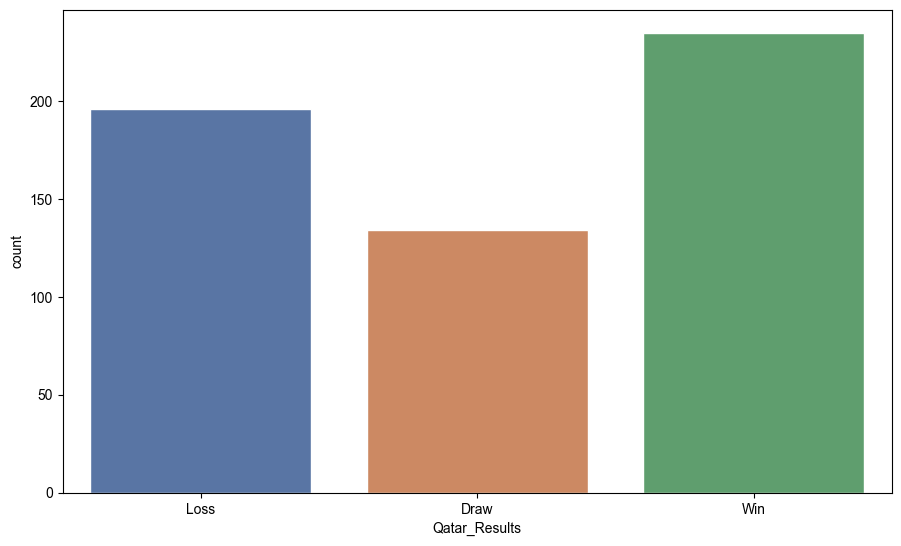

In [41]:
wins = []
for row in Qatar_match['Winning Team']:
    if row == 'Draw':
        wins.append('Draw')    
    else:
        if row == 'Qatar':
            wins.append('Win')
        elif row != 'Qatar':
            wins.append('Loss')

winsdf= pd.DataFrame(wins, columns=['Qatar_Results'])

#plotting
fig, ax = plt.subplots(1)
fig.set_size_inches(10.7, 6.27)
sns.set(style='darkgrid')
sns.countplot(x='Qatar_Results', data=winsdf)
Qatar_Odds = round((len(winsdf.loc[winsdf['Qatar_Results'].str.contains('Win')])) / (len(Qatar_match['ID'])) * 100, 2)

In [42]:
# 해야할 것
# 머신러닝을 통해 test값과 train값 산출하여
# 카타르 월드컵 출전국가들 끼리 승패를 예측하여 최종 우승국가 예측

In [43]:
# 불필요한 행을 지우고 행 이름 변경
df1.rename(columns={0:'Group'}, inplace= True)
df1.rename(columns={1:'Team'}, inplace=True)
df1.rename(columns={2:'FIFA Ranking'}, inplace=True)
df1.drop(index=0)

,Group,Team,FIFA Ranking
1,A,Qatar,50
2,A,Ecuador,44
3,A,Senegal,18
4,A,Netherlands,8
5,B,England,5
6,B,Iran,20
7,B,United States,16
8,B,Wales,19
9,C,Argentina,3
10,C,Saudi Arabia,51


In [44]:
# df1 자료를 활용하여 카타르 월드컵에 출전한 국가를 조별로 Group화
# 0행을 지웠는데 출력이 됨 -> 코드를 고칠까? or csv파일 수정하여 0행을 아예 날리고 다시 실행할까
# 후자의 경우 모든 csv파일을 수정해야 일관성이 있을듯
world_cup_participate = df1.groupby(['Group'])
for key, group in world_cup_participate:
    print('* Group: ', key)
    print('* Country: ', len(group))
    print(group.head())
    print('\n')

* Group:  A
* Country:  4
  Group         Team FIFA Ranking
1     A        Qatar           50
2     A      Ecuador           44
3     A      Senegal           18
4     A  Netherlands            8


* Group:  B
* Country:  4
  Group           Team FIFA Ranking
5     B        England            5
6     B           Iran           20
7     B  United States           16
8     B          Wales           19


* Group:  C
* Country:  4
   Group          Team FIFA Ranking
9      C     Argentina            3
10     C  Saudi Arabia           51
11     C        Mexico           13
12     C        Poland           26


* Group:  D
* Country:  4
   Group       Team FIFA Ranking
13     D     France            4
14     D  Australia           38
15     D    Denmark           10
16     D    Tunisia           30


* Group:  E
* Country:  4
   Group        Team FIFA Ranking
17     E       Spain            7
18     E  Costa Rica           31
19     E     Germany           11
20     E       Japan           

C:\Users\knh30\AppData\Local\Temp\ipykernel_34200\2115767463.py:5: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, group in world_cup_participate:


## 2022 월드컵에 출전한 32개의 국가에 대해 역대 경기의 승패여부를 그래프로 표현

ID                 536
Tournament         536
Date               536
Home Team          536
Home Goals         536
Away Goals         536
Away Team          536
Winning Team       536
Losing Team        536
Win Conditions     536
Home Stadium       536
Goal Difference    536
match_count        536
dtype: int64

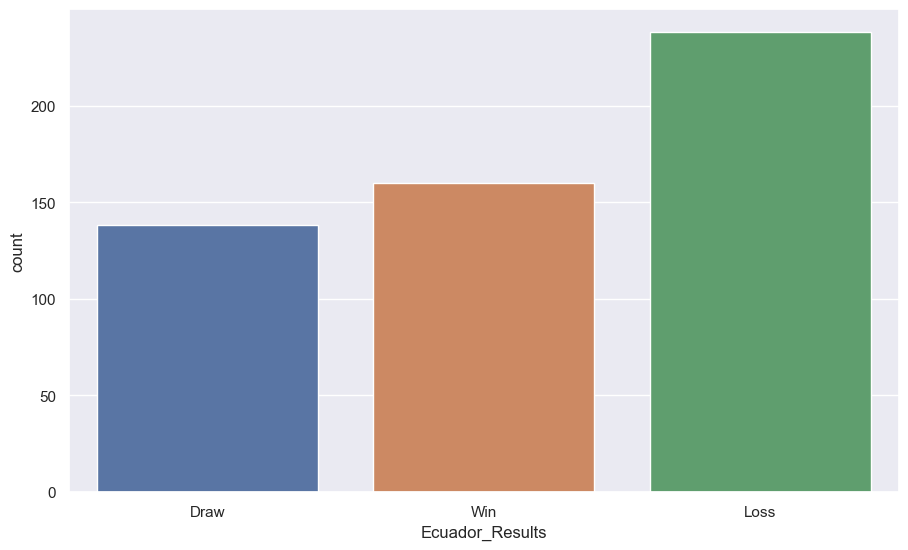

In [45]:
# 에콰도르
df = df4[(df4['Home Team'] == 'Ecuador') | (df4['Away Team'] == 'Ecuador')]
Ecuador = df.iloc[:]
Ecuador.head(len(df4))

year = []
for row in Ecuador['Date']:
    year.append(int(row[:4]))
Ecuador['match_count'] = year
Ecuador_match = Ecuador[Ecuador.match_count >= 1800]

wins = []
for row in Ecuador_match['Winning Team']:
    if row == 'Draw':
        wins.append('Draw')
    else:
        if row != 'Ecuador':
            wins.append('Loss')
        elif row == 'Ecuador':
            wins.append('Win')
winsdf= pd.DataFrame(wins, columns=['Ecuador_Results'])

# #plotting
fig, ax = plt.subplots(1)
fig.set_size_inches(10.7, 6.27)
sns.set(style='darkgrid')
sns.countplot(x='Ecuador_Results', data=winsdf)
Ecuador_Odds = round((len(winsdf.loc[winsdf['Ecuador_Results'].str.contains('Win')])) / (len(Ecuador_match['ID'])) * 100, 2)
Ecuador_match.count()

ID                 570
Tournament         570
Date               570
Home Team          570
Home Goals         570
Away Goals         570
Away Team          570
Winning Team       570
Losing Team        570
Win Conditions     570
Home Stadium       570
Goal Difference    570
match_count        570
dtype: int64

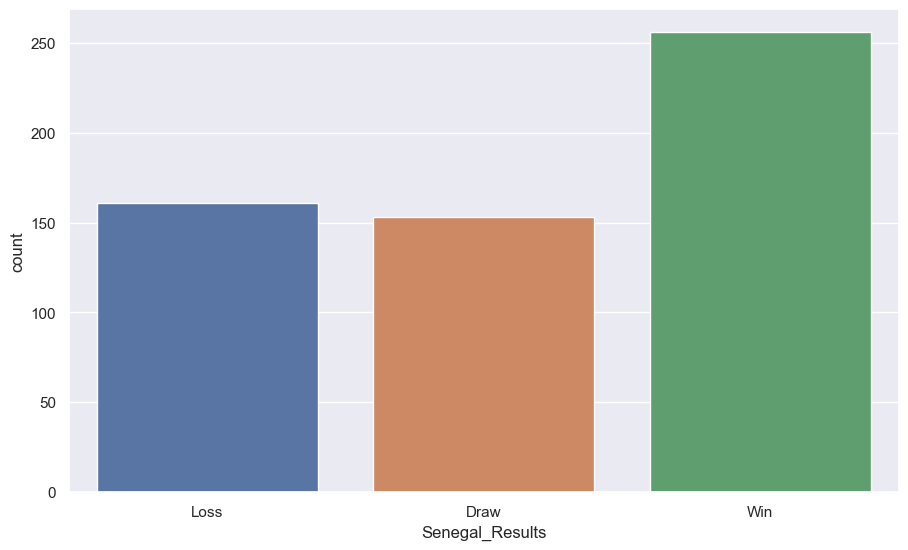

In [46]:
# 세네갈
df = df4[(df4['Home Team'] == 'Senegal') | (df4['Away Team'] == 'Senegal')]
Senegal = df.iloc[:]
Senegal.head(len(df4))

year = []
for row in Senegal['Date']:
    year.append(int(row[:4]))
Senegal['match_count'] = year
Senegal_match = Senegal[Senegal.match_count >= 1800]

wins = []
for row in Senegal_match['Winning Team']:
    if row == 'Draw':
        wins.append('Draw')
    else:
        if row != 'Senegal':
            wins.append('Loss')
        elif row == 'Senegal':
            wins.append('Win')
winsdf= pd.DataFrame(wins, columns=['Senegal_Results'])

# #plotting
fig, ax = plt.subplots(1)
fig.set_size_inches(10.7, 6.27)
sns.set(style='darkgrid')
sns.countplot(x='Senegal_Results', data=winsdf)
Senegal_Odds = round((len(winsdf.loc[winsdf['Senegal_Results'].str.contains('Win')])) / (len(Senegal_match['ID'])) * 100, 2)
Senegal_match.count()

ID                 767
Tournament         767
Date               767
Home Team          767
Home Goals         767
Away Goals         767
Away Team          767
Winning Team       767
Losing Team        767
Win Conditions     767
Home Stadium       767
Goal Difference    767
match_count        767
dtype: int64

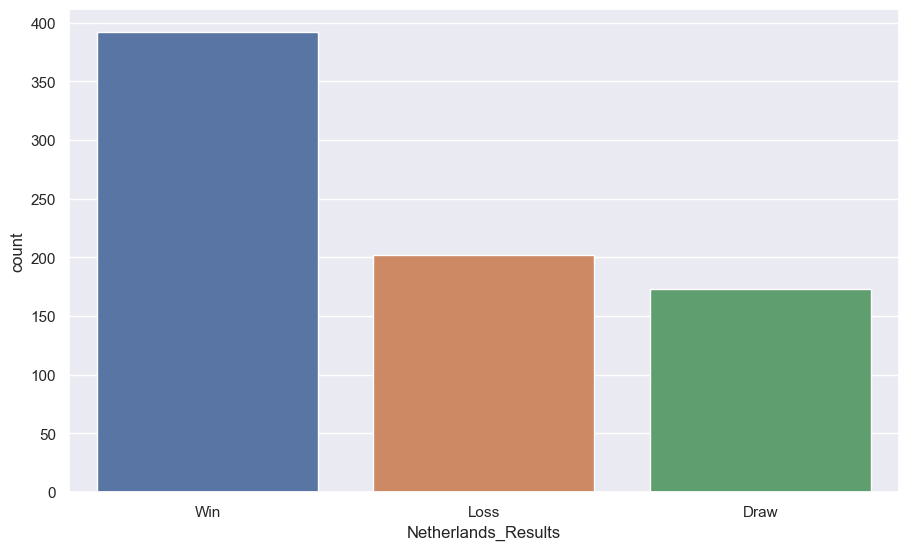

In [47]:
# 네덜란드
df = df4[(df4['Home Team'] == 'Netherlands') | (df4['Away Team'] == 'Netherlands')]
Netherlands = df.iloc[:]
Netherlands.head(len(df4))

year = []
for row in Netherlands['Date']:
    year.append(int(row[:4]))
Netherlands['match_count'] = year
Netherlands_match = Netherlands[Netherlands.match_count >= 1800]

wins = []
for row in Netherlands_match['Winning Team']:
    if row == 'Draw':
        wins.append('Draw')
    else:
        if row != 'Netherlands':
            wins.append('Loss')
        elif row == 'Netherlands':
            wins.append('Win')
winsdf= pd.DataFrame(wins, columns=['Netherlands_Results'])

# #plotting
fig, ax = plt.subplots(1)
fig.set_size_inches(10.7, 6.27)
sns.set(style='darkgrid')
sns.countplot(x='Netherlands_Results', data=winsdf)
Netherlands_Odds = round((len(winsdf.loc[winsdf['Netherlands_Results'].str.contains('Win')])) / (len(Netherlands_match['ID'])) * 100, 2)
Netherlands_match.count()

ID                 975
Tournament         975
Date               975
Home Team          975
Home Goals         975
Away Goals         975
Away Team          975
Winning Team       975
Losing Team        975
Win Conditions     975
Home Stadium       975
Goal Difference    975
match_count        975
dtype: int64

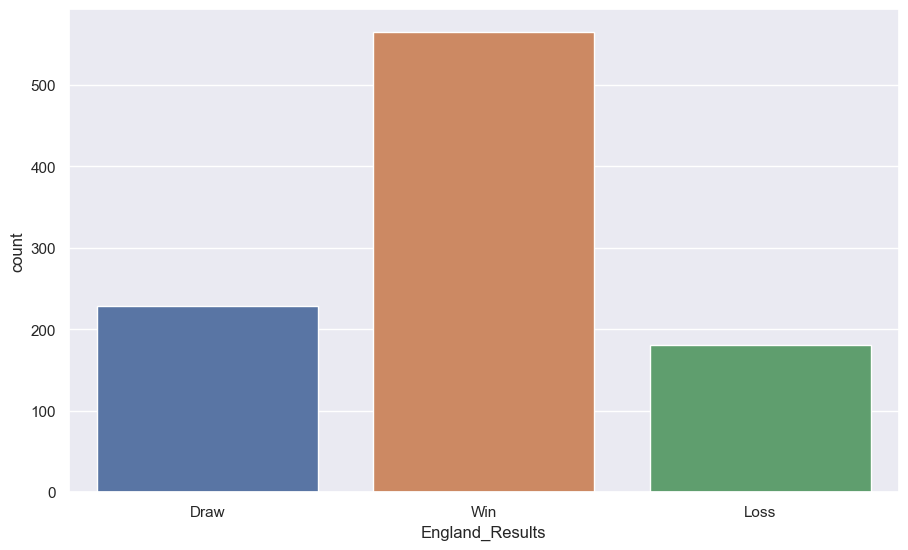

In [48]:
# 잉글랜드
df = df4[(df4['Home Team'] == 'England') | (df4['Away Team'] == 'England')]
England = df.iloc[:]
England.head(len(df4))

year = []
for row in England['Date']:
    year.append(int(row[:4]))
England['match_count'] = year
England_match = England[England.match_count >= 1800]

wins = []
for row in England_match['Winning Team']:
    if row == 'Draw':
        wins.append('Draw')
    else:
        if row != 'England':
            wins.append('Loss')
        elif row == 'England':
            wins.append('Win')
winsdf= pd.DataFrame(wins, columns=['England_Results'])

# #plotting
fig, ax = plt.subplots(1)
fig.set_size_inches(10.7, 6.27)
sns.set(style='darkgrid')
sns.countplot(x='England_Results', data=winsdf)
England_Odds = round((len(winsdf.loc[winsdf['England_Results'].str.contains('Win')])) / (len(England_match['ID'])) * 100, 2)
England_match.count()

ID                 503
Tournament         503
Date               503
Home Team          503
Home Goals         503
Away Goals         503
Away Team          503
Winning Team       503
Losing Team        503
Win Conditions     503
Home Stadium       503
Goal Difference    503
match_count        503
dtype: int64

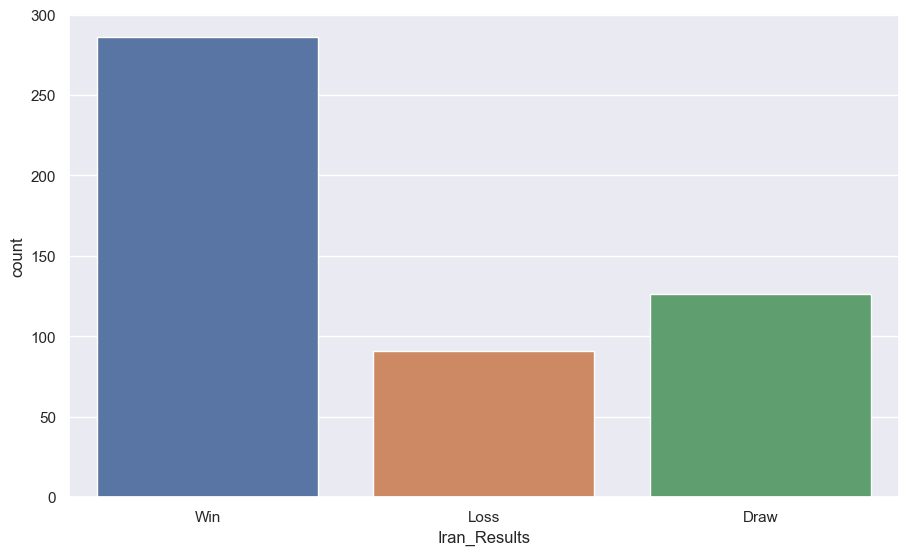

In [49]:
# 이란
df = df4[(df4['Home Team'] == 'Iran') | (df4['Away Team'] == 'Iran')]
Iran = df.iloc[:]
Iran.head(len(df4))

year = []
for row in Iran['Date']:
    year.append(int(row[:4]))
Iran['match_count'] = year
Iran_match = Iran[Iran.match_count >= 1800]

wins = []
for row in Iran_match['Winning Team']:
    if row == 'Draw':
        wins.append('Draw')
    else:
        if row != 'Iran':
            wins.append('Loss')
        elif row == 'Iran':
            wins.append('Win')
winsdf= pd.DataFrame(wins, columns=['Iran_Results'])

# #plotting
fig, ax = plt.subplots(1)
fig.set_size_inches(10.7, 6.27)
sns.set(style='darkgrid')
sns.countplot(x='Iran_Results', data=winsdf)
Iran_Odds = round((len(winsdf.loc[winsdf['Iran_Results'].str.contains('Win')])) / (len(Iran_match['ID'])) * 100, 2)
Iran_match.count()

ID                 691
Tournament         691
Date               691
Home Team          691
Home Goals         691
Away Goals         691
Away Team          691
Winning Team       691
Losing Team        691
Win Conditions     691
Home Stadium       691
Goal Difference    691
match_count        691
dtype: int64

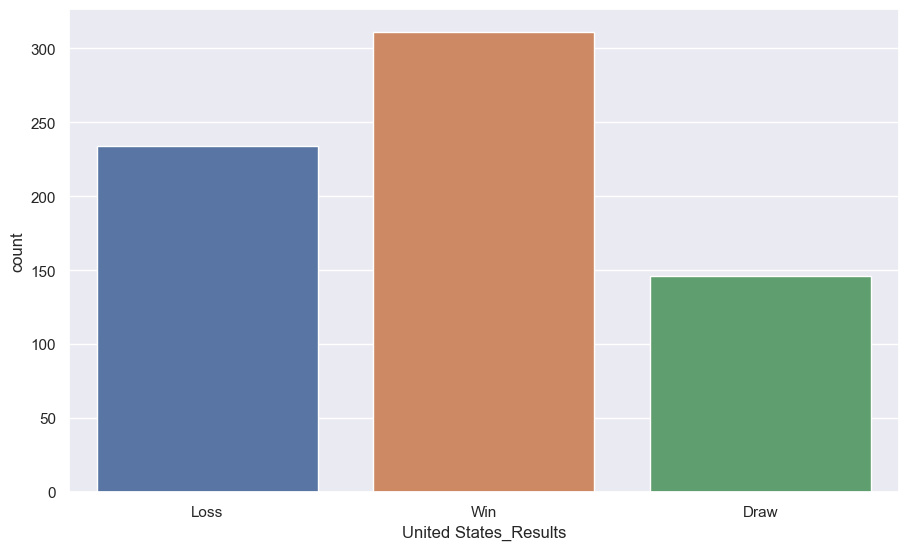

In [50]:
# 미국
df = df4[(df4['Home Team'] == 'United States') | (df4['Away Team'] == 'United States')]
USA = df.iloc[:]
USA.head(len(df4))

year = []
for row in USA['Date']:
    year.append(int(row[:4]))
USA['match_count'] = year
USA_match = USA[USA.match_count >= 1800]

wins = []
for row in USA_match['Winning Team']:
    if row == 'Draw':
        wins.append('Draw')
    else:
        if row != 'United States':
            wins.append('Loss')
        elif row == 'United States':
            wins.append('Win')
winsdf= pd.DataFrame(wins, columns=['United States_Results'])

# #plotting
fig, ax = plt.subplots(1)
fig.set_size_inches(10.7, 6.27)
sns.set(style='darkgrid')
sns.countplot(x='United States_Results', data=winsdf)
USA_Odds = round((len(winsdf.loc[winsdf['United States_Results'].str.contains('Win')])) / (len(USA_match['ID'])) * 100, 2)
USA_match.count()

ID                 684
Tournament         684
Date               684
Home Team          684
Home Goals         684
Away Goals         684
Away Team          684
Winning Team       684
Losing Team        684
Win Conditions     684
Home Stadium       684
Goal Difference    684
match_count        684
dtype: int64

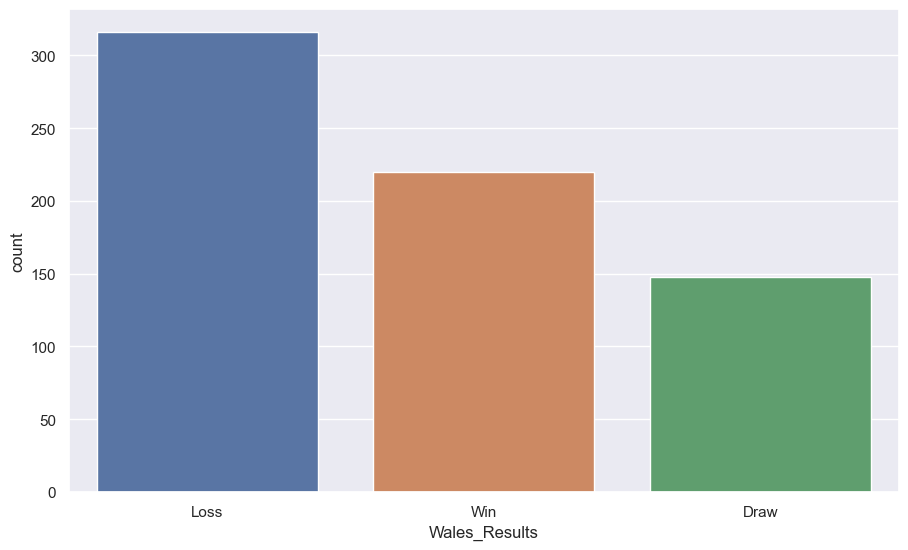

In [51]:
# 웨일스
df = df4[(df4['Home Team'] == 'Wales') | (df4['Away Team'] == 'Wales')]
Wales = df.iloc[:]
Wales.head(len(df4))

year = []
for row in Wales['Date']:
    year.append(int(row[:4]))
Wales['match_count'] = year
Wales_match = Wales[Wales.match_count >= 1800]

wins = []
for row in Wales_match['Winning Team']:
    if row == 'Draw':
        wins.append('Draw')
    else:
        if row != 'Wales':
            wins.append('Loss')
        elif row == 'Wales':
            wins.append('Win')
winsdf= pd.DataFrame(wins, columns=['Wales_Results'])

# #plotting
fig, ax = plt.subplots(1)
fig.set_size_inches(10.7, 6.27)
sns.set(style='darkgrid')
sns.countplot(x='Wales_Results', data=winsdf)
Wales_Odds = round((len(winsdf.loc[winsdf['Wales_Results'].str.contains('Win')])) / (len(Wales_match['ID'])) * 100, 2)
Wales_match.count()

ID                 929
Tournament         929
Date               929
Home Team          929
Home Goals         929
Away Goals         929
Away Team          929
Winning Team       929
Losing Team        929
Win Conditions     929
Home Stadium       929
Goal Difference    929
match_count        929
dtype: int64

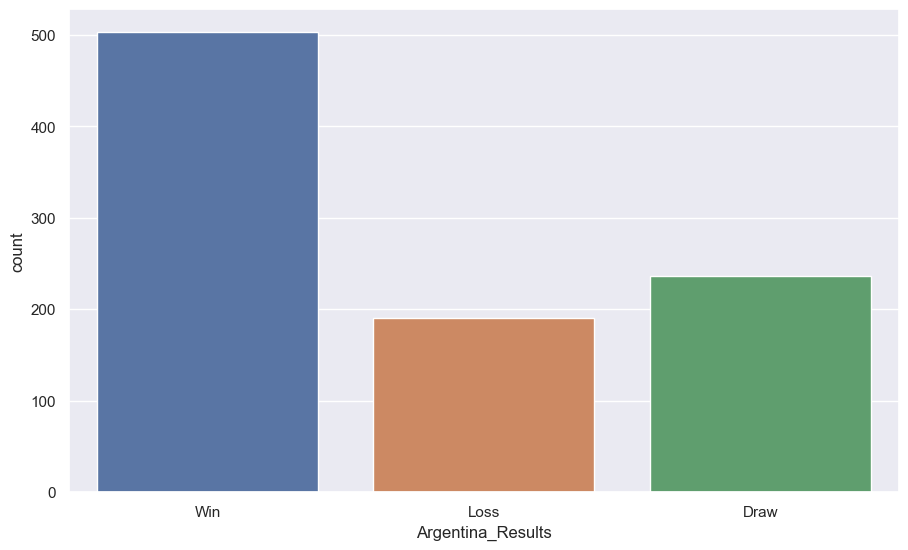

In [52]:
# 아르헨티나
df = df4[(df4['Home Team'] == 'Argentina') | (df4['Away Team'] == 'Argentina')]
Argentina = df.iloc[:]
Argentina.head(len(df4))

year = []
for row in Argentina['Date']:
    year.append(int(row[:4]))
Argentina['match_count'] = year
Argentina_match = Argentina[Argentina.match_count >= 1800]

wins = []
for row in Argentina_match['Winning Team']:
    if row == 'Draw':
        wins.append('Draw')
    else:
        if row != 'Argentina':
            wins.append('Loss')
        elif row == 'Argentina':
            wins.append('Win')
winsdf= pd.DataFrame(wins, columns=['Argentina_Results'])

# #plotting
fig, ax = plt.subplots(1)
fig.set_size_inches(10.7, 6.27)
sns.set(style='darkgrid')
sns.countplot(x='Argentina_Results', data=winsdf)
Argentina_Odds = round((len(winsdf.loc[winsdf['Argentina_Results'].str.contains('Win')])) / (len(Argentina_match['ID'])) * 100, 2)
Argentina_match.count()

ID                 632
Tournament         632
Date               632
Home Team          632
Home Goals         632
Away Goals         632
Away Team          632
Winning Team       632
Losing Team        632
Win Conditions     632
Home Stadium       632
Goal Difference    632
match_count        632
dtype: int64

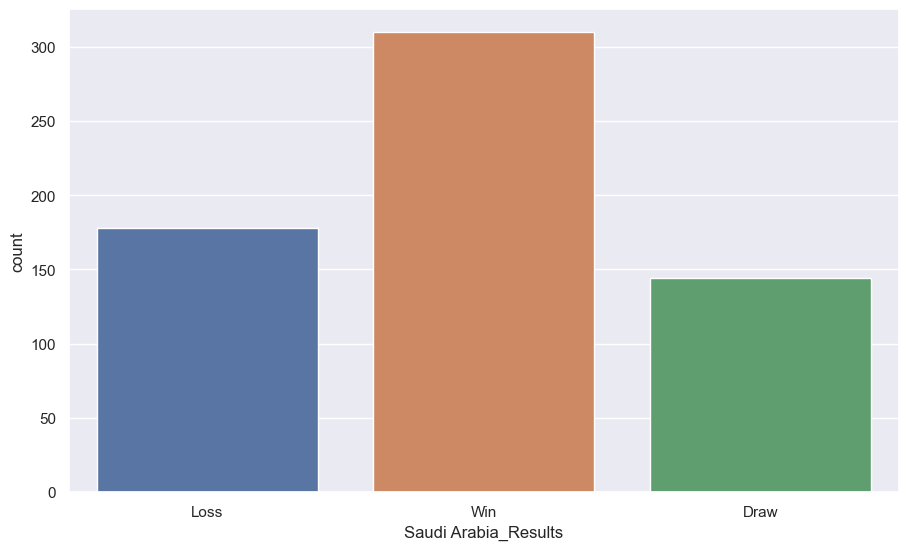

In [53]:
# 사우디 아라비아
df = df4[(df4['Home Team'] == 'Saudi Arabia') | (df4['Away Team'] == 'Saudi Arabia')]
Saudi = df.iloc[:]
Saudi.head(len(df4))

year = []
for row in Saudi['Date']:
    year.append(int(row[:4]))
Saudi['match_count'] = year
Saudi_match = Saudi[Saudi.match_count >= 1800]

wins = []
for row in Saudi_match['Winning Team']:
    if row == 'Draw':
        wins.append('Draw')
    else:
        if row != 'Saudi Arabia':
            wins.append('Loss')
        elif row == 'Saudi Arabia':
            wins.append('Win')
winsdf= pd.DataFrame(wins, columns=['Saudi Arabia_Results'])

# #plotting
fig, ax = plt.subplots(1)
fig.set_size_inches(10.7, 6.27)
sns.set(style='darkgrid')
sns.countplot(x='Saudi Arabia_Results', data=winsdf)
Saudi_Odds = round((len(winsdf.loc[winsdf['Saudi Arabia_Results'].str.contains('Win')])) / (len(Saudi_match['ID'])) * 100, 2)
Saudi_match.count()

ID                 864
Tournament         864
Date               864
Home Team          864
Home Goals         864
Away Goals         864
Away Team          864
Winning Team       864
Losing Team        864
Win Conditions     864
Home Stadium       864
Goal Difference    864
match_count        864
dtype: int64

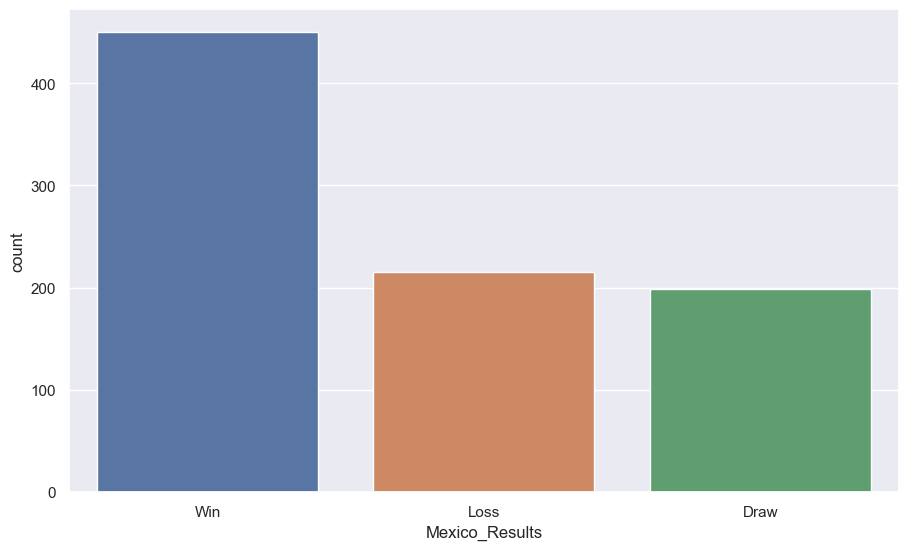

In [54]:
# 멕시코
df = df4[(df4['Home Team'] == 'Mexico') | (df4['Away Team'] == 'Mexico')]
Mexico = df.iloc[:]
Mexico.head(len(df4))

year = []
for row in Mexico['Date']:
    year.append(int(row[:4]))
Mexico['match_count'] = year
Mexico_match = Mexico[Mexico.match_count >= 1800]

wins = []
for row in Mexico_match['Winning Team']:
    if row == 'Draw':
        wins.append('Draw')
    else:
        if row != 'Mexico':
            wins.append('Loss')
        elif row == 'Mexico':
            wins.append('Win')
winsdf= pd.DataFrame(wins, columns=['Mexico_Results'])

# #plotting
fig, ax = plt.subplots(1)
fig.set_size_inches(10.7, 6.27)
sns.set(style='darkgrid')
sns.countplot(x='Mexico_Results', data=winsdf)
Mexico_Odds = round((len(winsdf.loc[winsdf['Mexico_Results'].str.contains('Win')])) / (len(Mexico_match['ID'])) * 100, 2)
Mexico_match.count()

ID                 813
Tournament         813
Date               813
Home Team          813
Home Goals         813
Away Goals         813
Away Team          813
Winning Team       813
Losing Team        813
Win Conditions     813
Home Stadium       813
Goal Difference    813
match_count        813
dtype: int64

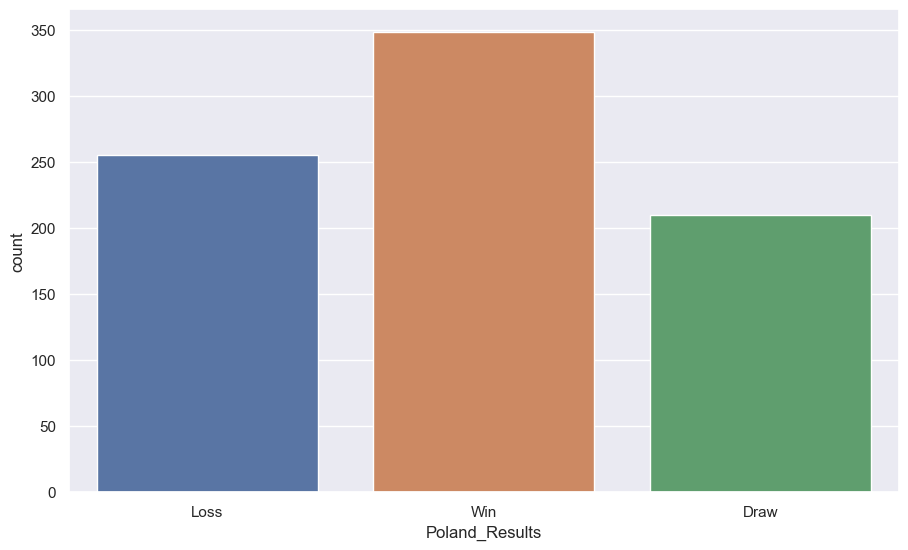

In [55]:
# 폴란드
df = df4[(df4['Home Team'] == 'Poland') | (df4['Away Team'] == 'Poland')]
Poland = df.iloc[:]
Poland.head(len(df4))

year = []
for row in Poland['Date']:
    year.append(int(row[:4]))
Poland['match_count'] = year
Poland_match = Poland[Poland.match_count >= 1800]

wins = []
for row in Poland_match['Winning Team']:
    if row == 'Draw':
        wins.append('Draw')
    else:
        if row != 'Poland':
            wins.append('Loss')
        elif row == 'Poland':
            wins.append('Win')
winsdf= pd.DataFrame(wins, columns=['Poland_Results'])

# #plotting
fig, ax = plt.subplots(1)
fig.set_size_inches(10.7, 6.27)
sns.set(style='darkgrid')
sns.countplot(x='Poland_Results', data=winsdf)
Poland_Odds = round((len(winsdf.loc[winsdf['Poland_Results'].str.contains('Win')])) / (len(Poland_match['ID'])) * 100, 2)
Poland_match.count()

ID                 806
Tournament         806
Date               806
Home Team          806
Home Goals         806
Away Goals         806
Away Team          806
Winning Team       806
Losing Team        806
Win Conditions     806
Home Stadium       806
Goal Difference    806
match_count        806
dtype: int64

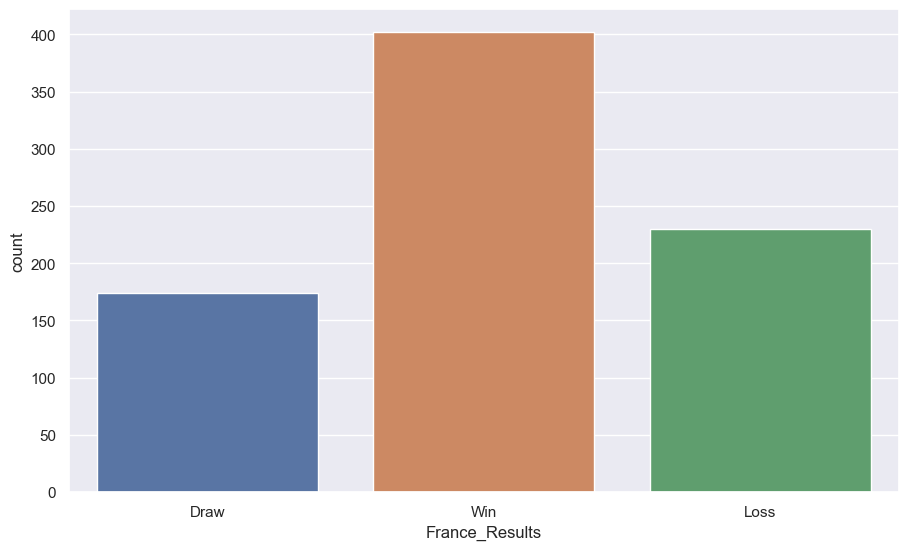

In [56]:
# 프랑스
df = df4[(df4['Home Team'] == 'France') | (df4['Away Team'] == 'France')]
France = df.iloc[:]
France.head(len(df4))

year = []
for row in France['Date']:
    year.append(int(row[:4]))
France['match_count'] = year
France_match = France[France.match_count >= 1800]

wins = []
for row in France_match['Winning Team']:
    if row == 'Draw':
        wins.append('Draw')
    else:
        if row != 'France':
            wins.append('Loss')
        elif row == 'France':
            wins.append('Win')
winsdf= pd.DataFrame(wins, columns=['France_Results'])

# #plotting
fig, ax = plt.subplots(1)
fig.set_size_inches(10.7, 6.27)
sns.set(style='darkgrid')
sns.countplot(x='France_Results', data=winsdf)
France_Odds = round((len(winsdf.loc[winsdf['France_Results'].str.contains('Win')])) / (len(France_match['ID'])) * 100, 2)
France_match.count()

ID                 520
Tournament         520
Date               520
Home Team          520
Home Goals         520
Away Goals         520
Away Team          520
Winning Team       520
Losing Team        520
Win Conditions     520
Home Stadium       520
Goal Difference    520
match_count        520
dtype: int64

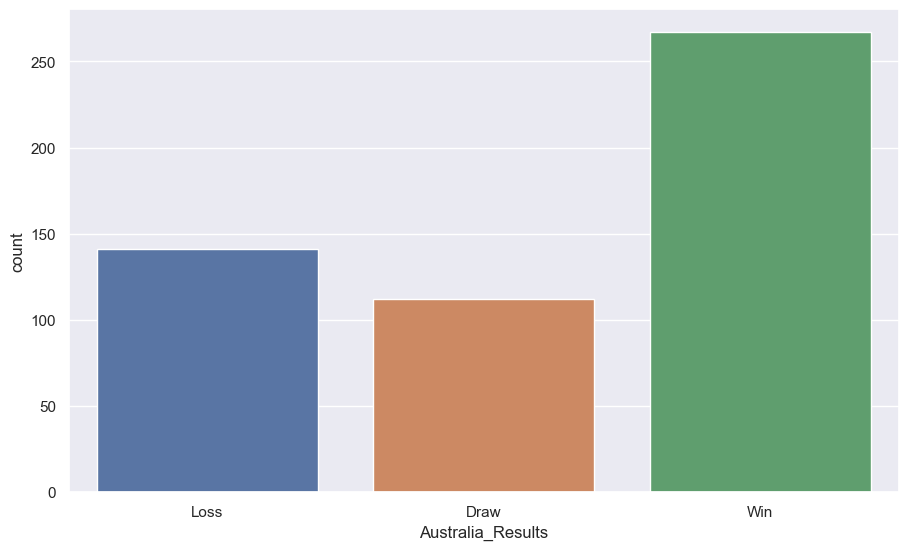

In [57]:
# 호주
df = df4[(df4['Home Team'] == 'Australia') | (df4['Away Team'] == 'Australia')]
Australia = df.iloc[:]
Australia.head(len(df4))

year = []
for row in Australia['Date']:
    year.append(int(row[:4]))
Australia['match_count'] = year
Australia_match = Australia[Australia.match_count >= 1800]

wins = []
for row in Australia_match['Winning Team']:
    if row == 'Draw':
        wins.append('Draw')
    else:
        if row != 'Australia':
            wins.append('Loss')
        elif row == 'Australia':
            wins.append('Win')
winsdf= pd.DataFrame(wins, columns=['Australia_Results'])

# #plotting
fig, ax = plt.subplots(1)
fig.set_size_inches(10.7, 6.27)
sns.set(style='darkgrid')
sns.countplot(x='Australia_Results', data=winsdf)
Australia_Odds = round((len(winsdf.loc[winsdf['Australia_Results'].str.contains('Win')])) / (len(Australia_match['ID'])) * 100, 2)
Australia_match.count()

ID                 809
Tournament         809
Date               809
Home Team          809
Home Goals         809
Away Goals         809
Away Team          809
Winning Team       809
Losing Team        809
Win Conditions     809
Home Stadium       809
Goal Difference    809
match_count        809
dtype: int64

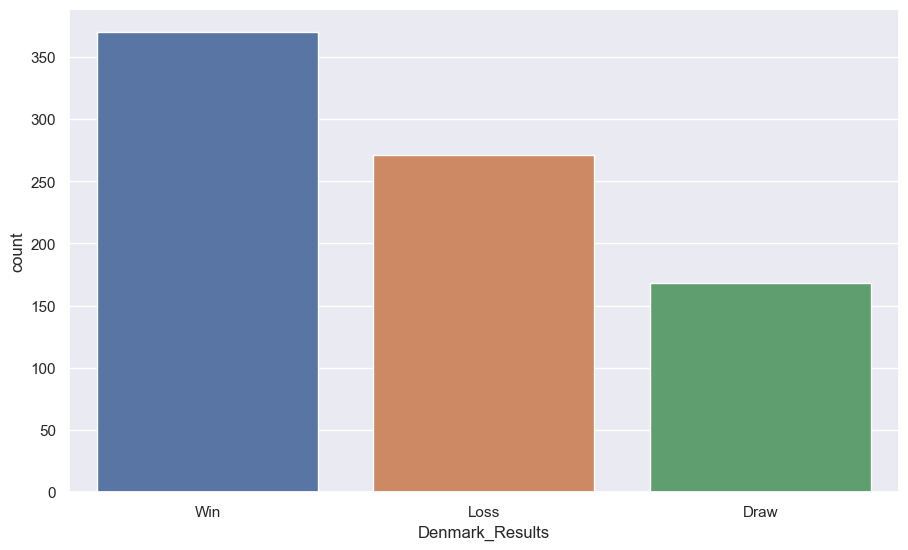

In [58]:
# 덴마크
df = df4[(df4['Home Team'] == 'Denmark') | (df4['Away Team'] == 'Denmark')]
Denmark = df.iloc[:]
Denmark.head(len(df4))

year = []
for row in Denmark['Date']:
    year.append(int(row[:4]))
Denmark['match_count'] = year
Denmark_match = Denmark[Denmark.match_count >= 1800]

wins = []
for row in Denmark_match['Winning Team']:
    if row == 'Draw':
        wins.append('Draw')
    else:
        if row != 'Denmark':
            wins.append('Loss')
        elif row == 'Denmark':
            wins.append('Win')
winsdf= pd.DataFrame(wins, columns=['Denmark_Results'])

# #plotting
fig, ax = plt.subplots(1)
fig.set_size_inches(10.7, 6.27)
sns.set(style='darkgrid')
sns.countplot(x='Denmark_Results', data=winsdf)
Denmark_Odds = round((len(winsdf.loc[winsdf['Denmark_Results'].str.contains('Win')])) / (len(Denmark_match['ID'])) * 100, 2)
Denmark_match.count()

ID                 604
Tournament         604
Date               604
Home Team          604
Home Goals         604
Away Goals         604
Away Team          604
Winning Team       604
Losing Team        604
Win Conditions     604
Home Stadium       604
Goal Difference    604
match_count        604
dtype: int64

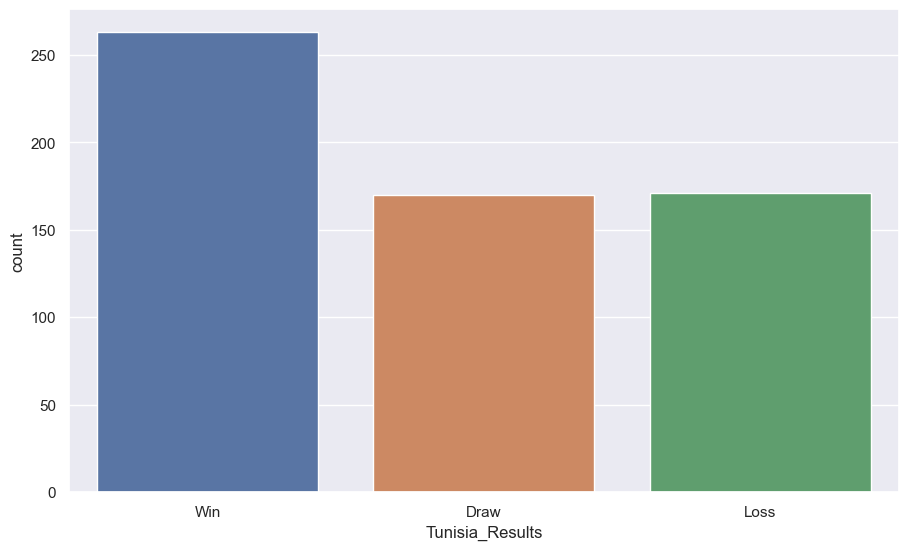

In [59]:
# 튀니지
df = df4[(df4['Home Team'] == 'Tunisia') | (df4['Away Team'] == 'Tunisia')]
Tunisia = df.iloc[:]
Tunisia.head(len(df4))

year = []
for row in Tunisia['Date']:
    year.append(int(row[:4]))
Tunisia['match_count'] = year
Tunisia_match = Tunisia[Tunisia.match_count >= 1800]

wins = []
for row in Tunisia_match['Winning Team']:
    if row == 'Draw':
        wins.append('Draw')
    else:
        if row != 'Tunisia':
            wins.append('Loss')
        elif row == 'Tunisia':
            wins.append('Win')
winsdf= pd.DataFrame(wins, columns=['Tunisia_Results'])

# #plotting
fig, ax = plt.subplots(1)
fig.set_size_inches(10.7, 6.27)
sns.set(style='darkgrid')
sns.countplot(x='Tunisia_Results', data=winsdf)
Tunisia_Odds = round((len(winsdf.loc[winsdf['Tunisia_Results'].str.contains('Win')])) / (len(Tunisia_match['ID'])) * 100, 2)
Tunisia_match.count()

ID                 665
Tournament         665
Date               665
Home Team          665
Home Goals         665
Away Goals         665
Away Team          665
Winning Team       665
Losing Team        665
Win Conditions     665
Home Stadium       665
Goal Difference    665
match_count        665
dtype: int64

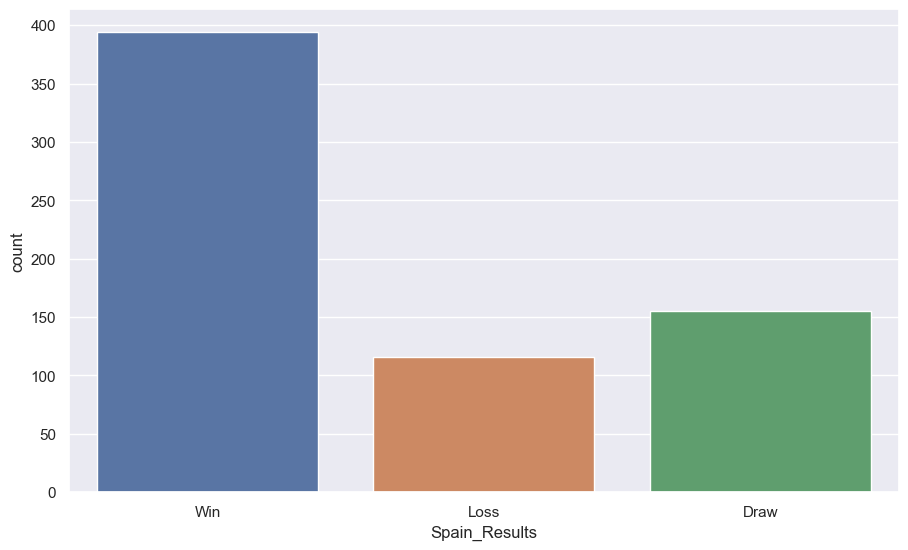

In [60]:
# 스페인
df = df4[(df4['Home Team'] == 'Spain') | (df4['Away Team'] == 'Spain')]
Spain = df.iloc[:]
Spain.head(len(df4))

year = []
for row in Spain['Date']:
    year.append(int(row[:4]))
Spain['match_count'] = year
Spain_match = Spain[Spain.match_count >= 1800]

wins = []
for row in Spain_match['Winning Team']:
    if row == 'Draw':
        wins.append('Draw')
    else:
        if row != 'Spain':
            wins.append('Loss')
        elif row == 'Spain':
            wins.append('Win')
winsdf= pd.DataFrame(wins, columns=['Spain_Results'])

# #plotting
fig, ax = plt.subplots(1)
fig.set_size_inches(10.7, 6.27)
sns.set(style='darkgrid')
sns.countplot(x='Spain_Results', data=winsdf)
Spain_Odds = round((len(winsdf.loc[winsdf['Spain_Results'].str.contains('Win')])) / (len(Spain_match['ID'])) * 100, 2)
Spain_match.count()

ID                 629
Tournament         629
Date               629
Home Team          629
Home Goals         629
Away Goals         629
Away Team          629
Winning Team       629
Losing Team        629
Win Conditions     629
Home Stadium       629
Goal Difference    629
match_count        629
dtype: int64

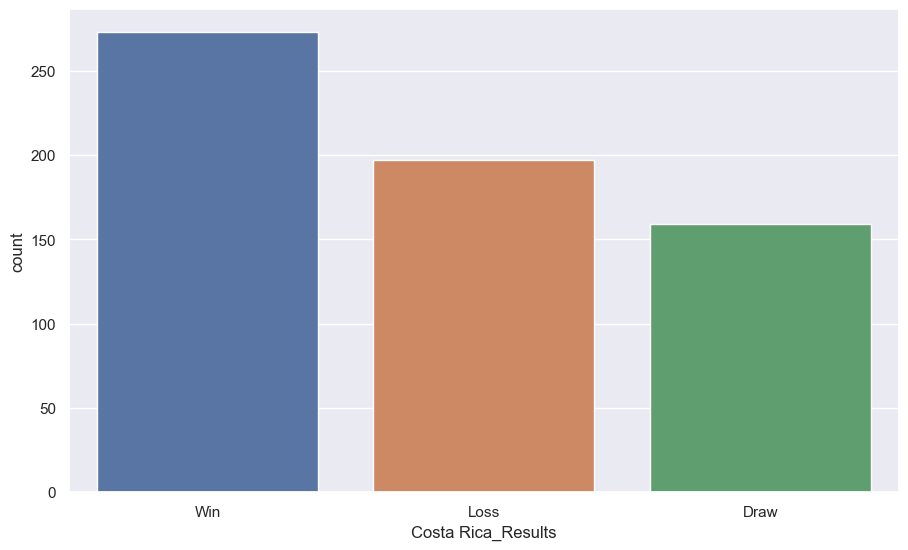

In [61]:
# 코스타리카
df = df4[(df4['Home Team'] == 'Costa Rica') | (df4['Away Team'] == 'Costa Rica')]
Costa = df.iloc[:]
Costa.head(len(df4))

year = []
for row in Costa['Date']:
    year.append(int(row[:4]))
Costa['match_count'] = year
Costa_match = Costa[Costa.match_count >= 1800]

wins = []
for row in Costa_match['Winning Team']:
    if row == 'Draw':
        wins.append('Draw')
    else:
        if row != 'Costa Rica':
            wins.append('Loss')
        elif row == 'Costa Rica':
            wins.append('Win')
winsdf= pd.DataFrame(wins, columns=['Costa Rica_Results'])

# #plotting
fig, ax = plt.subplots(1)
fig.set_size_inches(10.7, 6.27)
sns.set(style='darkgrid')
sns.countplot(x='Costa Rica_Results', data=winsdf)
Costa_Odds = round((len(winsdf.loc[winsdf['Costa Rica_Results'].str.contains('Win')])) / (len(Costa_match['ID'])) * 100, 2)
Costa_match.count()

ID                 873
Tournament         873
Date               873
Home Team          873
Home Goals         873
Away Goals         873
Away Team          873
Winning Team       873
Losing Team        873
Win Conditions     873
Home Stadium       873
Goal Difference    873
match_count        873
dtype: int64

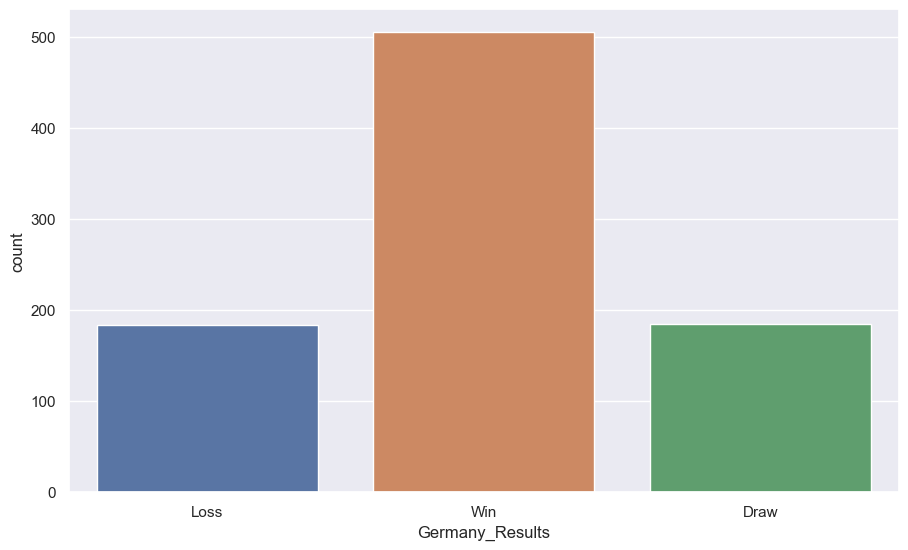

In [62]:
# 독일
df = df4[(df4['Home Team'] == 'Germany') | (df4['Away Team'] == 'Germany')]
Germany = df.iloc[:]
Germany.head(len(df4))

year = []
for row in Germany['Date']:
    year.append(int(row[:4]))
Germany['match_count'] = year
Germany_match = Germany[Germany.match_count >= 1800]

wins = []
for row in Germany_match['Winning Team']:
    if row == 'Draw':
        wins.append('Draw')
    else:
        if row != 'Germany':
            wins.append('Loss')
        elif row == 'Germany':
            wins.append('Win')
winsdf= pd.DataFrame(wins, columns=['Germany_Results'])

# #plotting
fig, ax = plt.subplots(1)
fig.set_size_inches(10.7, 6.27)
sns.set(style='darkgrid')
sns.countplot(x='Germany_Results', data=winsdf)
Germany_Odds = round((len(winsdf.loc[winsdf['Germany_Results'].str.contains('Win')])) / (len(Germany_match['ID'])) * 100, 2)
Germany_match.count()

ID                 659
Tournament         659
Date               659
Home Team          659
Home Goals         659
Away Goals         659
Away Team          659
Winning Team       659
Losing Team        659
Win Conditions     659
Home Stadium       659
Goal Difference    659
match_count        659
dtype: int64

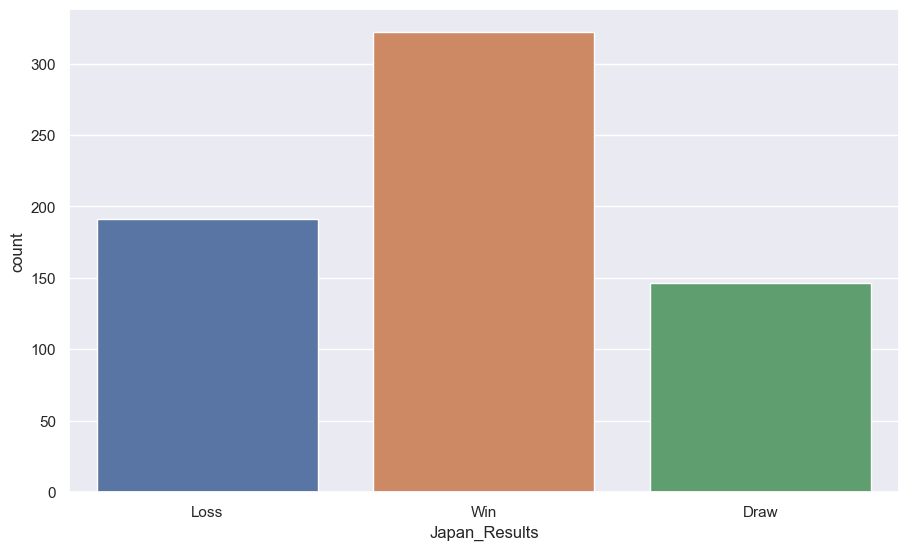

In [63]:
# 일본
df = df4[(df4['Home Team'] == 'Japan') | (df4['Away Team'] == 'Japan')]
Japan = df.iloc[:]
Japan.head(len(df4))

year = []
for row in Japan['Date']:
    year.append(int(row[:4]))
Japan['match_count'] = year
Japan_match = Japan[Japan.match_count >= 1800]

wins = []
for row in Japan_match['Winning Team']:
    if row == 'Draw':
        wins.append('Draw')
    else:
        if row != 'Japan':
            wins.append('Loss')
        elif row == 'Japan':
            wins.append('Win')
winsdf= pd.DataFrame(wins, columns=['Japan_Results'])

# #plotting
fig, ax = plt.subplots(1)
fig.set_size_inches(10.7, 6.27)
sns.set(style='darkgrid')
sns.countplot(x='Japan_Results', data=winsdf)
Japan_Odds = round((len(winsdf.loc[winsdf['Japan_Results'].str.contains('Win')])) / (len(Japan_match['ID'])) * 100, 2)
Japan_match.count()

ID                 753
Tournament         753
Date               753
Home Team          753
Home Goals         753
Away Goals         753
Away Team          753
Winning Team       753
Losing Team        753
Win Conditions     753
Home Stadium       753
Goal Difference    753
match_count        753
dtype: int64

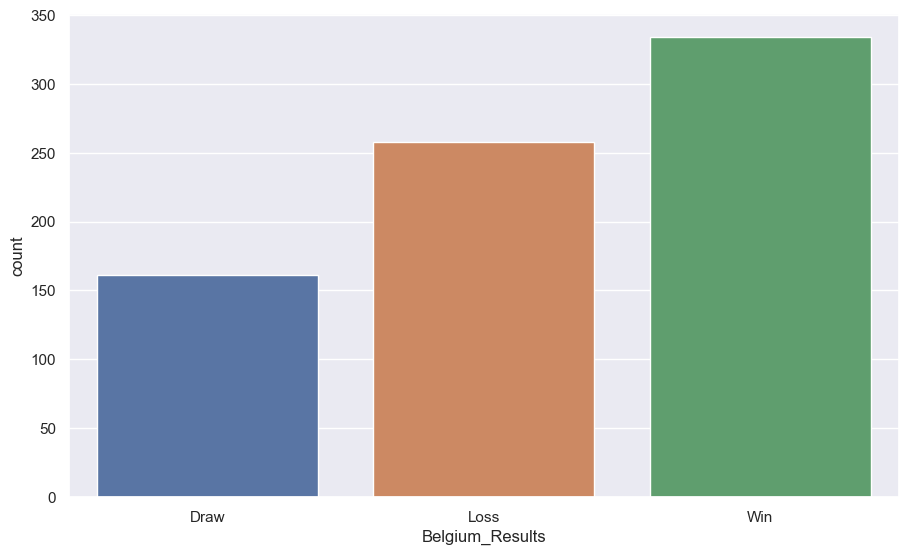

In [64]:
# 벨기에
df = df4[(df4['Home Team'] == 'Belgium') | (df4['Away Team'] == 'Belgium')]
Belgium = df.iloc[:]
Belgium.head(len(df4))

year = []
for row in Belgium['Date']:
    year.append(int(row[:4]))
Belgium['match_count'] = year
Belgium_match = Belgium[Belgium.match_count >= 1800]

wins = []
for row in Belgium_match['Winning Team']:
    if row == 'Draw':
        wins.append('Draw')
    else:
        if row != 'Belgium':
            wins.append('Loss')
        elif row == 'Belgium':
            wins.append('Win')
winsdf= pd.DataFrame(wins, columns=['Belgium_Results'])

# #plotting
fig, ax = plt.subplots(1)
fig.set_size_inches(10.7, 6.27)
sns.set(style='darkgrid')
sns.countplot(x='Belgium_Results', data=winsdf)
Belgium_Odds = round((len(winsdf.loc[winsdf['Belgium_Results'].str.contains('Win')])) / (len(Belgium_match['ID'])) * 100, 2)
Belgium_match.count()

ID                 409
Tournament         409
Date               409
Home Team          409
Home Goals         409
Away Goals         409
Away Team          409
Winning Team       409
Losing Team        409
Win Conditions     409
Home Stadium       409
Goal Difference    409
match_count        409
dtype: int64

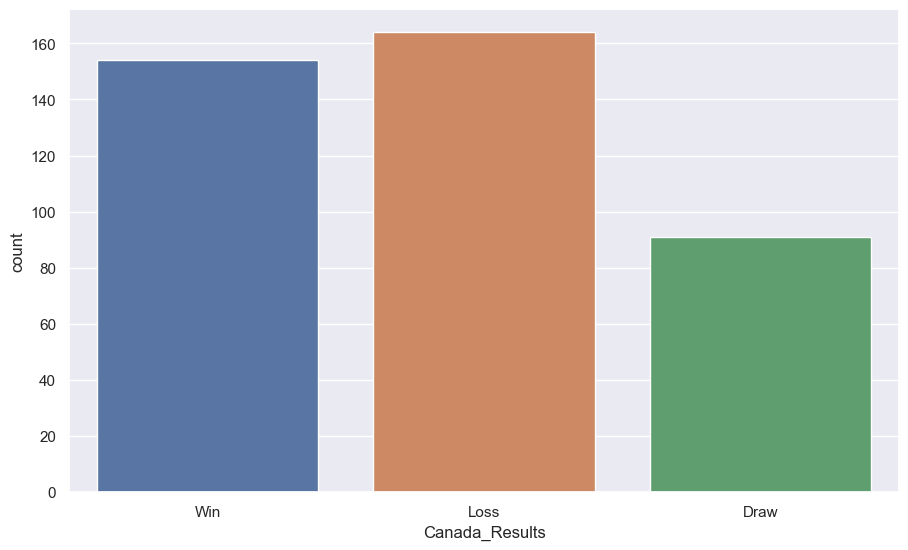

In [65]:
# 캐나다
df = df4[(df4['Home Team'] == 'Canada') | (df4['Away Team'] == 'Canada')]
Canada = df.iloc[:]
Canada.head(len(df4))

year = []
for row in Canada['Date']:
    year.append(int(row[:4]))
Canada['match_count'] = year
Canada_match = Canada[Canada.match_count >= 1800]

wins = []
for row in Canada_match['Winning Team']:
    if row == 'Draw':
        wins.append('Draw')
    else:
        if row != 'Canada':
            wins.append('Loss')
        elif row == 'Canada':
            wins.append('Win')
winsdf= pd.DataFrame(wins, columns=['Canada_Results'])

# #plotting
fig, ax = plt.subplots(1)
fig.set_size_inches(10.7, 6.27)
sns.set(style='darkgrid')
sns.countplot(x='Canada_Results', data=winsdf)
Canada_Odds = round((len(winsdf.loc[winsdf['Canada_Results'].str.contains('Win')])) / (len(Canada_match['ID'])) * 100, 2)
Canada_match.count()

ID                 556
Tournament         556
Date               556
Home Team          556
Home Goals         556
Away Goals         556
Away Team          556
Winning Team       556
Losing Team        556
Win Conditions     556
Home Stadium       556
Goal Difference    556
match_count        556
dtype: int64

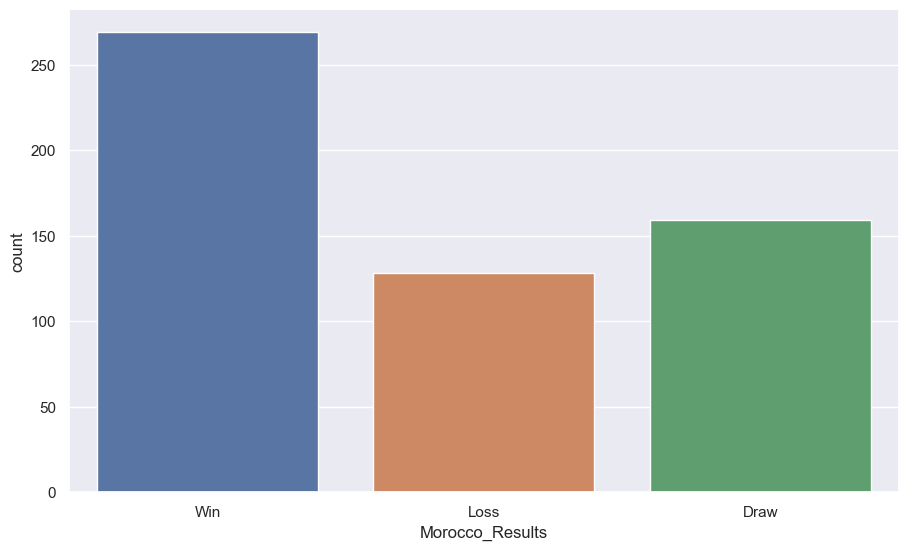

In [66]:
# 모로코
df = df4[(df4['Home Team'] == 'Morocco') | (df4['Away Team'] == 'Morocco')]
Morocco = df.iloc[:]
Morocco.head(len(df4))

year = []
for row in Morocco['Date']:
    year.append(int(row[:4]))
Morocco['match_count'] = year
Morocco_match = Morocco[Morocco.match_count >= 1800]

wins = []
for row in Morocco_match['Winning Team']:
    if row == 'Draw':
        wins.append('Draw')
    else:
        if row != 'Morocco':
            wins.append('Loss')
        elif row == 'Morocco':
            wins.append('Win')
winsdf= pd.DataFrame(wins, columns=['Morocco_Results'])

# #plotting
fig, ax = plt.subplots(1)
fig.set_size_inches(10.7, 6.27)
sns.set(style='darkgrid')
sns.countplot(x='Morocco_Results', data=winsdf)
Morocco_Odds = round((len(winsdf.loc[winsdf['Morocco_Results'].str.contains('Win')])) / (len(Morocco_match['ID'])) * 100, 2)
Morocco_match.count()

ID                 328
Tournament         328
Date               328
Home Team          328
Home Goals         328
Away Goals         328
Away Team          328
Winning Team       328
Losing Team        328
Win Conditions     328
Home Stadium       328
Goal Difference    328
match_count        328
dtype: int64

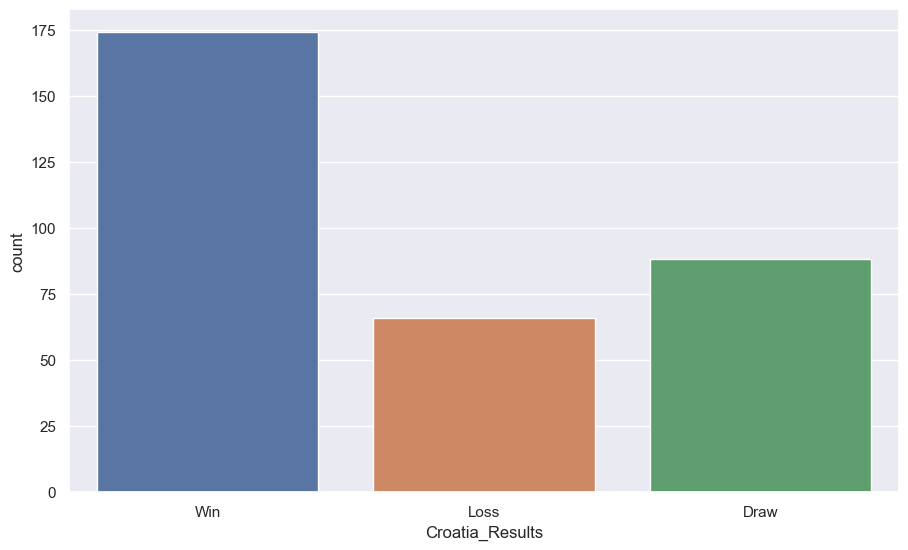

In [67]:
# 크로아티아
df = df4[(df4['Home Team'] == 'Croatia') | (df4['Away Team'] == 'Croatia')]
Croatia = df.iloc[:]
Croatia.head(len(df4))

year = []
for row in Croatia['Date']:
    year.append(int(row[:4]))
Croatia['match_count'] = year
Croatia_match = Croatia[Croatia.match_count >= 1800]

wins = []
for row in Croatia_match['Winning Team']:
    if row == 'Draw':
        wins.append('Draw')
    else:
        if row != 'Croatia':
            wins.append('Loss')
        elif row == 'Croatia':
            wins.append('Win')
winsdf= pd.DataFrame(wins, columns=['Croatia_Results'])

# #plotting
fig, ax = plt.subplots(1)
fig.set_size_inches(10.7, 6.27)
sns.set(style='darkgrid')
sns.countplot(x='Croatia_Results', data=winsdf)
Croatia_Odds = round((len(winsdf.loc[winsdf['Croatia_Results'].str.contains('Win')])) / (len(Croatia_match['ID'])) * 100, 2)
Croatia_match.count()

ID                 907
Tournament         907
Date               907
Home Team          907
Home Goals         907
Away Goals         907
Away Team          907
Winning Team       907
Losing Team        907
Win Conditions     907
Home Stadium       907
Goal Difference    907
match_count        907
dtype: int64

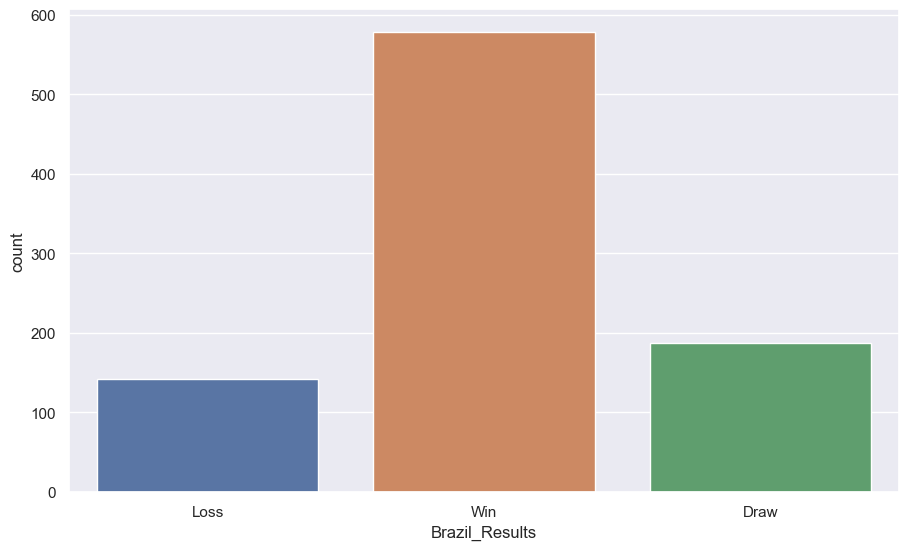

In [68]:
# 브라질
df = df4[(df4['Home Team'] == 'Brazil') | (df4['Away Team'] == 'Brazil')]
Brazil = df.iloc[:]
Brazil.head(len(df4))

year = []
for row in Brazil['Date']:
    year.append(int(row[:4]))
Brazil['match_count'] = year
Brazil_match = Brazil[Brazil.match_count >= 1800]

wins = []
for row in Brazil_match['Winning Team']:
    if row == 'Draw':
        wins.append('Draw')
    else:
        if row != 'Brazil':
            wins.append('Loss')
        elif row == 'Brazil':
            wins.append('Win')

winsdf= pd.DataFrame(wins, columns=['Brazil_Results'])

# #plotting
fig, ax = plt.subplots(1)
fig.set_size_inches(10.7, 6.27)
sns.set(style='darkgrid')
sns.countplot(x='Brazil_Results', data=winsdf)
Brazil_Odds = round((len(winsdf.loc[winsdf['Brazil_Results'].str.contains('Win')])) / (len(Brazil_match['ID'])) * 100, 2)
Brazil_match.count()

ID                 292
Tournament         292
Date               292
Home Team          292
Home Goals         292
Away Goals         292
Away Team          292
Winning Team       292
Losing Team        292
Win Conditions     292
Home Stadium       292
Goal Difference    292
match_count        292
dtype: int64

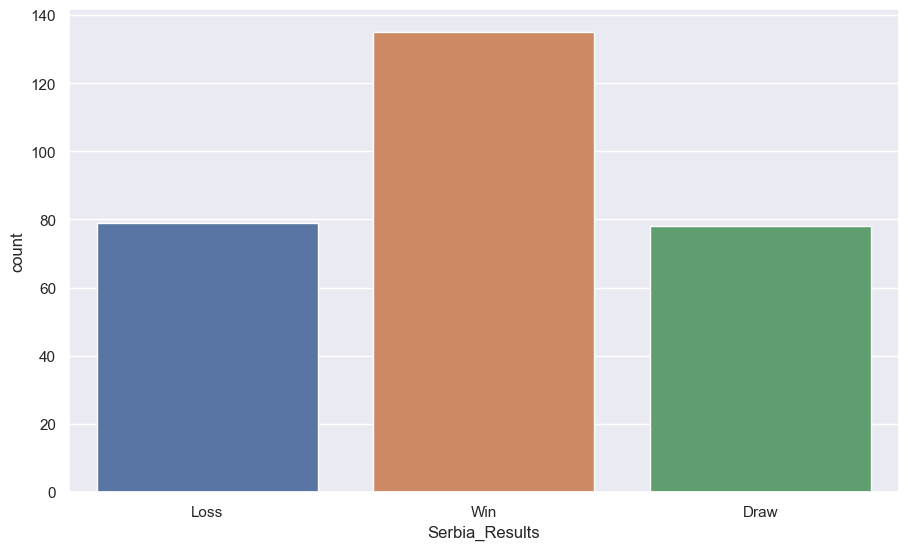

In [69]:
# 세르비아
df = df4[(df4['Home Team'] == 'Serbia') | (df4['Away Team'] == 'Serbia')]
Serbia = df.iloc[:]
Serbia.head(len(df4))

year = []
for row in Serbia['Date']:
    year.append(int(row[:4]))
Serbia['match_count'] = year
Serbia_match = Serbia[Serbia.match_count >= 1800]

wins = []
for row in Serbia_match['Winning Team']:
    if row == 'Draw':
        wins.append('Draw')
    else:
        if row != 'Serbia':
            wins.append('Loss')
        elif row == 'Serbia':
            wins.append('Win')

winsdf= pd.DataFrame(wins, columns=['Serbia_Results'])

# #plotting
fig, ax = plt.subplots(1)
fig.set_size_inches(10.7, 6.27)
sns.set(style='darkgrid')
sns.countplot(x='Serbia_Results', data=winsdf)
Serbia_Odds = round((len(winsdf.loc[winsdf['Serbia_Results'].str.contains('Win')])) / (len(Serbia_match['ID'])) * 100, 2)
Serbia_match.count()

ID                 794
Tournament         794
Date               794
Home Team          794
Home Goals         794
Away Goals         794
Away Team          794
Winning Team       794
Losing Team        794
Win Conditions     794
Home Stadium       794
Goal Difference    794
match_count        794
dtype: int64

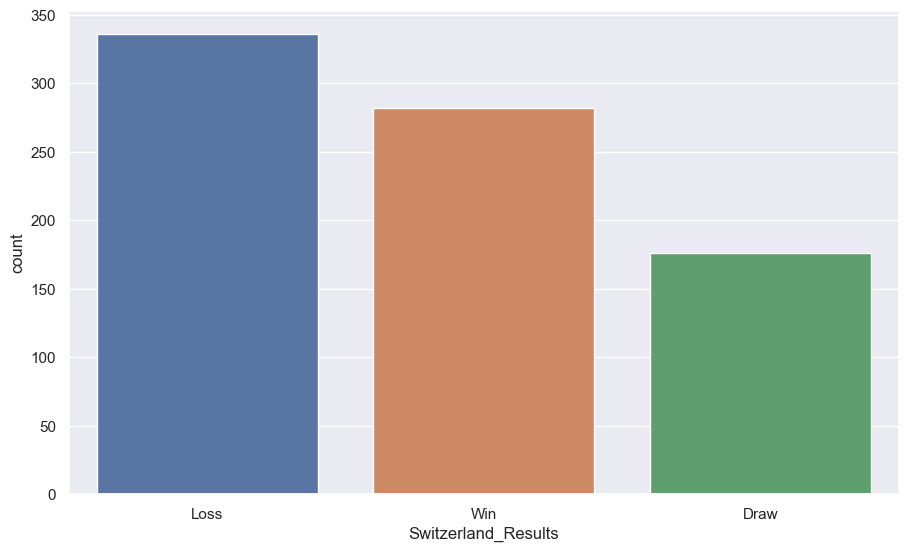

In [70]:
# 스위스
df = df4[(df4['Home Team'] == 'Switzerland') | (df4['Away Team'] == 'Switzerland')]
Switzerland = df.iloc[:]
Switzerland.head(len(df4))

year = []
for row in Switzerland['Date']:
    year.append(int(row[:4]))
Switzerland['match_count'] = year
Switzerland_match = Switzerland[Switzerland.match_count >= 1800]

wins = []
for row in Switzerland_match['Winning Team']:
    if row == 'Draw':
        wins.append('Draw')
    else:
        if row != 'Switzerland':
            wins.append('Loss')
        elif row == 'Switzerland':
            wins.append('Win')

winsdf= pd.DataFrame(wins, columns=['Switzerland_Results'])

# #plotting
fig, ax = plt.subplots(1)
fig.set_size_inches(10.7, 6.27)
sns.set(style='darkgrid')
sns.countplot(x='Switzerland_Results', data=winsdf)
Switzerland_Odds = round((len(winsdf.loc[winsdf['Switzerland_Results'].str.contains('Win')])) / (len(Switzerland_match['ID'])) * 100, 2)
Switzerland_match.count()

ID                 548
Tournament         548
Date               548
Home Team          548
Home Goals         548
Away Goals         548
Away Team          548
Winning Team       548
Losing Team        548
Win Conditions     548
Home Stadium       548
Goal Difference    548
match_count        548
dtype: int64

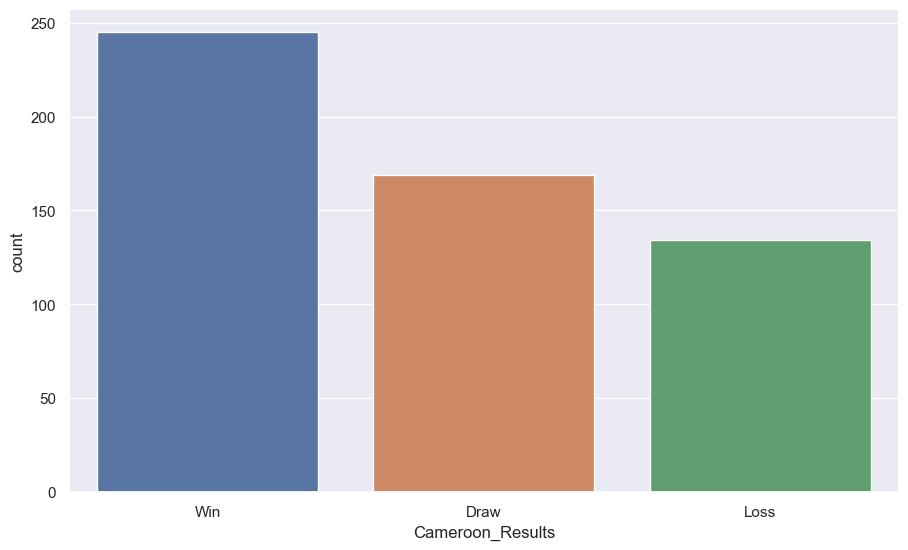

In [71]:
# 카메룬
df = df4[(df4['Home Team'] == 'Cameroon') | (df4['Away Team'] == 'Cameroon')]
Cameroon = df.iloc[:]
Cameroon.head(len(df4))

year = []
for row in Cameroon['Date']:
    year.append(int(row[:4]))
Cameroon['match_count'] = year
Cameroon_match = Cameroon[Cameroon.match_count >= 1800]

wins = []
for row in Cameroon_match['Winning Team']:
    if row == 'Draw':
        wins.append('Draw')
    else:
        if row != 'Cameroon':
            wins.append('Loss')
        elif row == 'Cameroon':
            wins.append('Win')

winsdf= pd.DataFrame(wins, columns=['Cameroon_Results'])

# #plotting
fig, ax = plt.subplots(1)
fig.set_size_inches(10.7, 6.27)
sns.set(style='darkgrid')
sns.countplot(x='Cameroon_Results', data=winsdf)
Cameroon_Odds = round((len(winsdf.loc[winsdf['Cameroon_Results'].str.contains('Win')])) / (len(Cameroon_match['ID'])) * 100, 2)
Cameroon_match.count()

ID                 615
Tournament         615
Date               615
Home Team          615
Home Goals         615
Away Goals         615
Away Team          615
Winning Team       615
Losing Team        615
Win Conditions     615
Home Stadium       615
Goal Difference    615
match_count        615
dtype: int64

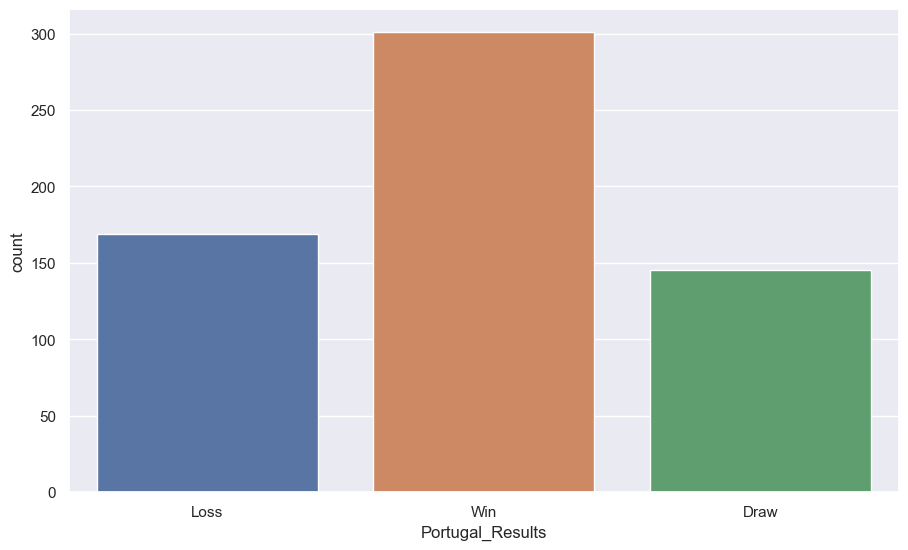

In [72]:
# 프로투갈
df = df4[(df4['Home Team'] == 'Portugal') | (df4['Away Team'] == 'Portugal')]
Portugal = df.iloc[:]
Portugal.head(len(df4))

year = []
for row in Portugal['Date']:
    year.append(int(row[:4]))
Portugal['match_count'] = year
Portugal_match = Portugal[Portugal.match_count >= 1800]

wins = []
for row in Portugal_match['Winning Team']:
    if row == 'Draw':
        wins.append('Draw')
    else:
        if row != 'Portugal':
            wins.append('Loss')
        elif row == 'Portugal':
            wins.append('Win')

winsdf= pd.DataFrame(wins, columns=['Portugal_Results'])

# #plotting
fig, ax = plt.subplots(1)
fig.set_size_inches(10.7, 6.27)
sns.set(style='darkgrid')
sns.countplot(x='Portugal_Results', data=winsdf)
Portugal_Odds = round((len(winsdf.loc[winsdf['Portugal_Results'].str.contains('Win')])) / (len(Portugal_match['ID'])) * 100, 2)
Portugal_match.count()

ID                 620
Tournament         620
Date               620
Home Team          620
Home Goals         620
Away Goals         620
Away Team          620
Winning Team       620
Losing Team        620
Win Conditions     620
Home Stadium       620
Goal Difference    620
match_count        620
dtype: int64

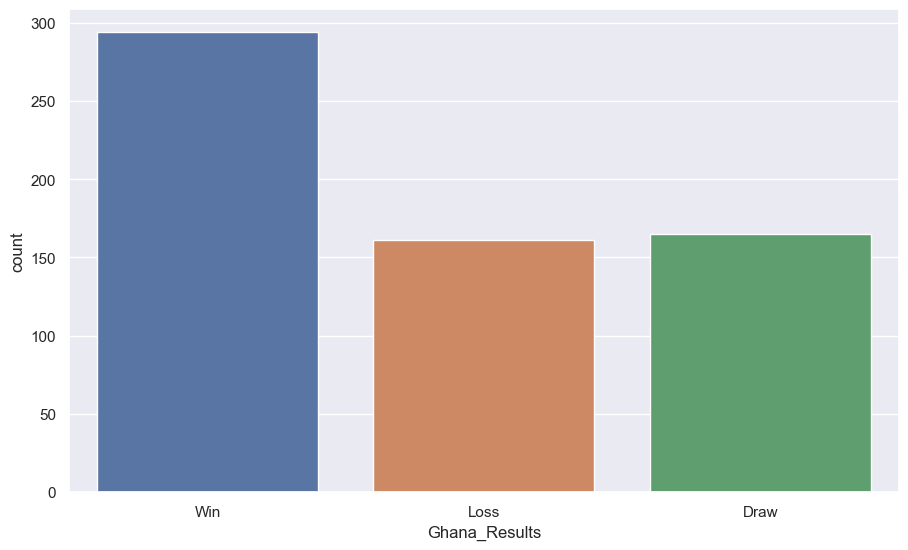

In [73]:
# 가나
df = df4[(df4['Home Team'] == 'Ghana') | (df4['Away Team'] == 'Ghana')]
Ghana = df.iloc[:]
Ghana.head(len(df4))

year = []
for row in Ghana['Date']:
    year.append(int(row[:4]))
Ghana['match_count'] = year
Ghana_match = Ghana[Ghana.match_count >= 1800]

wins = []
for row in Ghana_match['Winning Team']:
    if row == 'Draw':
        wins.append('Draw')
    else:
        if row != 'Ghana':
            wins.append('Loss')
        elif row == 'Ghana':
            wins.append('Win')

winsdf= pd.DataFrame(wins, columns=['Ghana_Results'])

# #plotting
fig, ax = plt.subplots(1)
fig.set_size_inches(10.7, 6.27)
sns.set(style='darkgrid')
sns.countplot(x='Ghana_Results', data=winsdf)
Ghana_Odds = round((len(winsdf.loc[winsdf['Ghana_Results'].str.contains('Win')])) / (len(Ghana_match['ID'])) * 100, 2)
Ghana_match.count()

ID                 860
Tournament         860
Date               860
Home Team          860
Home Goals         860
Away Goals         860
Away Team          860
Winning Team       860
Losing Team        860
Win Conditions     860
Home Stadium       860
Goal Difference    860
match_count        860
dtype: int64

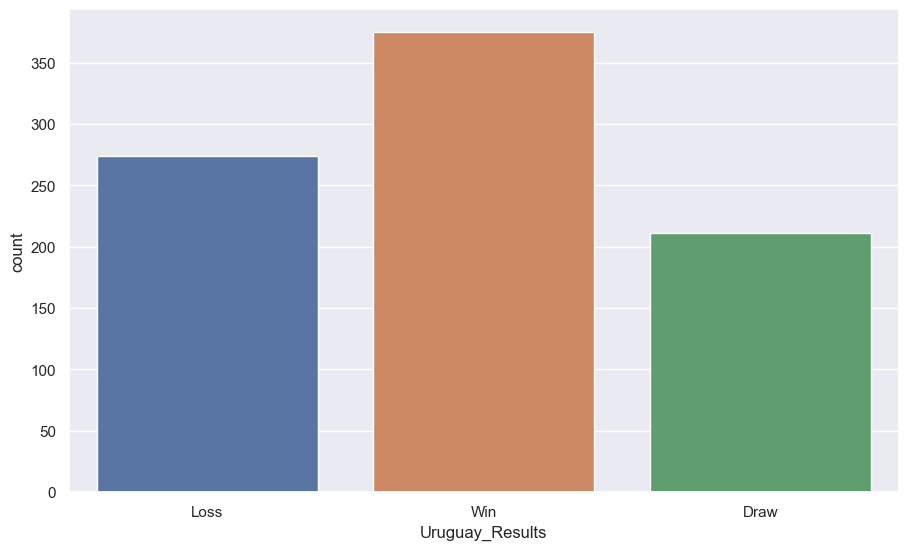

In [74]:
# 우루과이
df = df4[(df4['Home Team'] == 'Uruguay') | (df4['Away Team'] == 'Uruguay')]
Uruguay = df.iloc[:]
Uruguay.head(len(df4))

year = []
for row in Uruguay['Date']:
    year.append(int(row[:4]))
Uruguay['match_count'] = year
Uruguay_match = Uruguay[Uruguay.match_count >= 1800]

wins = []
for row in Uruguay_match['Winning Team']:
    if row == 'Draw':
        wins.append('Draw')
    else:
        if row != 'Uruguay':
            wins.append('Loss')
        elif row == 'Uruguay':
            wins.append('Win')

winsdf= pd.DataFrame(wins, columns=['Uruguay_Results'])

# #plotting
fig, ax = plt.subplots(1)
fig.set_size_inches(10.7, 6.27)
sns.set(style='darkgrid')
sns.countplot(x='Uruguay_Results', data=winsdf)
Uruguay_Odds = round((len(winsdf.loc[winsdf['Uruguay_Results'].str.contains('Win')])) / (len(Uruguay_match['ID'])) * 100, 2)
Uruguay_match.count()

ID                 866
Tournament         866
Date               866
Home Team          866
Home Goals         866
Away Goals         866
Away Team          866
Winning Team       866
Losing Team        866
Win Conditions     866
Home Stadium       866
Goal Difference    866
match_count        866
dtype: int64

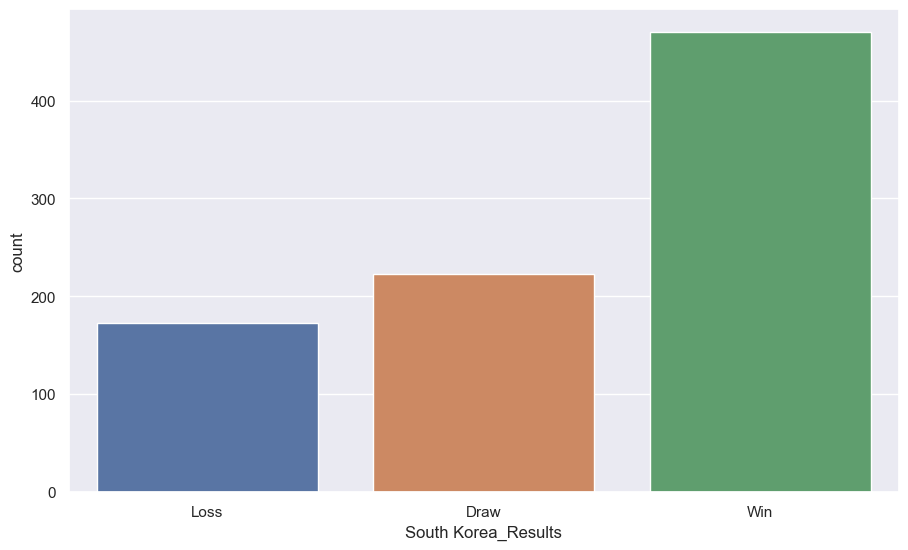

In [75]:
# 대한민국
df = df4[(df4['Home Team'] == 'South Korea') | (df4['Away Team'] == 'South Korea')]
Korea = df.iloc[:]
Korea.head(len(df4))

year = []
for row in Korea['Date']:
    year.append(int(row[:4]))
Korea['match_count'] = year
Korea_match = Korea[Korea.match_count >= 1800]

wins = []
for row in Korea_match['Winning Team']:
    if row == 'Draw':
            wins.append('Draw')
    else:
        if row != 'South Korea':
            wins.append('Loss')
        elif row == 'South Korea':
            wins.append('Win')

        
winsdf= pd.DataFrame(wins, columns=['South Korea_Results'])

# #plotting
fig, ax = plt.subplots(1)
fig.set_size_inches(10.7, 6.27)
sns.set(style='darkgrid')
sns.countplot(x='South Korea_Results', data=winsdf)
Korea_Odds = round((len(winsdf.loc[winsdf['South Korea_Results'].str.contains('Win')])) / (len(Korea_match['ID'])) * 100, 2)
Korea_match.count()

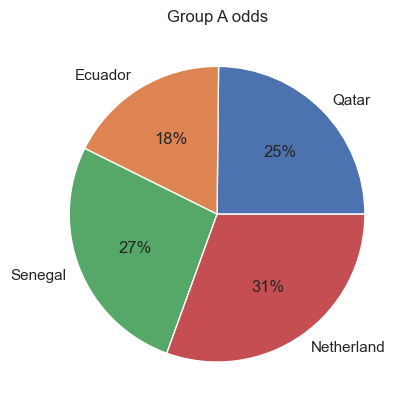

In [76]:
# 32개 국가 승률을 구하고 원그래프로 표시
GroupA_ratio = [Qatar_Odds, Ecuador_Odds, Senegal_Odds, Netherlands_Odds]
GroupB_ratio = [England_Odds, Iran_Odds, USA_Odds, Wales_Odds]
GroupC_ratio = [Argentina_Odds, Saudi_Odds, Mexico_Odds, Poland_Odds]
GroupD_ratio = [France_Odds, Australia_Odds, Denmark_Odds, Tunisia_Odds]
GroupE_ratio = [Spain_Odds, Costa_Odds, Germany_Odds, Japan_Odds]
GroupF_ratio = [Belgium_Odds, Canada_Odds, Morocco_Odds, Croatia_Odds]
GroupG_ratio = [Brazil_Odds, Serbia_Odds, Switzerland_Odds, Cameroon_Odds]
GroupH_ratio = [Portugal_Odds, Ghana_Odds, Uruguay_Odds, Korea_Odds]

GroupA_labels = ['Qatar', 'Ecuador', 'Senegal', 'Netherland']
GroupB_labels = ['England', 'Iran', 'USA', 'Wales']
GroupC_labels = ['Argentina', 'Saudi Arabia', 'Mexico', 'Poland']
GroupD_labels = ['France', 'Austraila', 'Denmark', 'Tunisia']
GroupE_labels = ['Spain', 'Costa Rica', 'Germany', 'Japan']
GroupF_labels = ['Belgium', 'Canada', 'Morocco', 'Croatia']
GroupG_labels = ['Brazil', 'Serbia', 'Switzerland', 'Cameroon']
GroupH_labels = ['Portugal', 'Ghana', 'Uruguay', 'Korea']

plt.title('Group A odds')
plt.pie(GroupA_ratio, labels=GroupA_labels, autopct='%1.f%%')
plt.show()

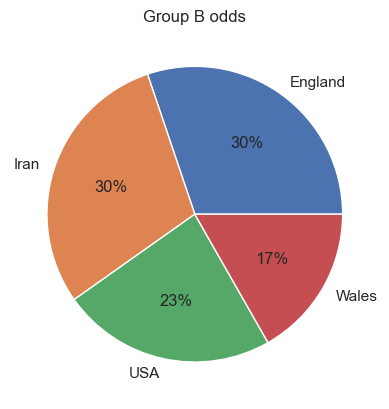

In [77]:
plt.title('Group B odds')
plt.pie(GroupB_ratio, labels=GroupB_labels, autopct='%1.f%%')
plt.show()

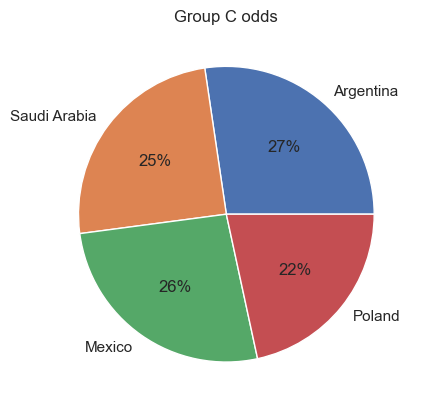

In [78]:
plt.title('Group C odds')
plt.pie(GroupC_ratio, labels=GroupC_labels, autopct='%1.f%%')
plt.show()

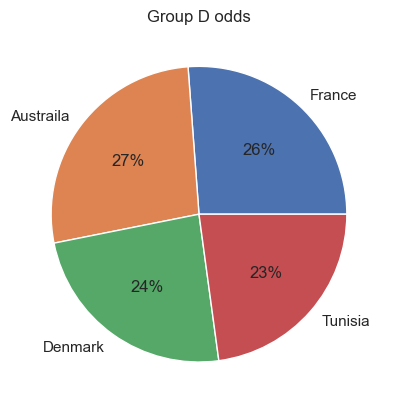

In [79]:
plt.title('Group D odds')
plt.pie(GroupD_ratio, labels=GroupD_labels, autopct='%1.f%%')
plt.show()

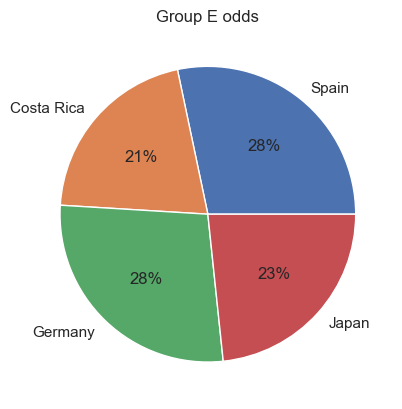

In [80]:
plt.title('Group E odds')
plt.pie(GroupE_ratio, labels=GroupE_labels, autopct='%1.f%%')
plt.show()

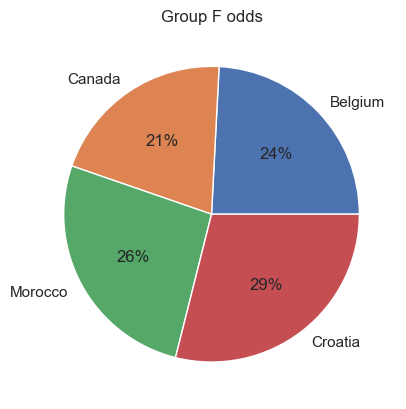

In [81]:
plt.title('Group F odds')
plt.pie(GroupF_ratio, labels=GroupF_labels, autopct='%1.f%%')
plt.show()

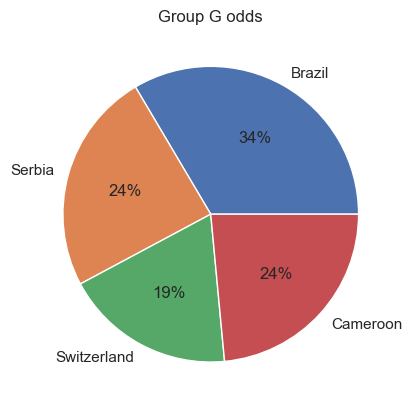

In [82]:
plt.title('Group G odds')
plt.pie(GroupG_ratio, labels=GroupG_labels, autopct='%1.f%%')
plt.show()

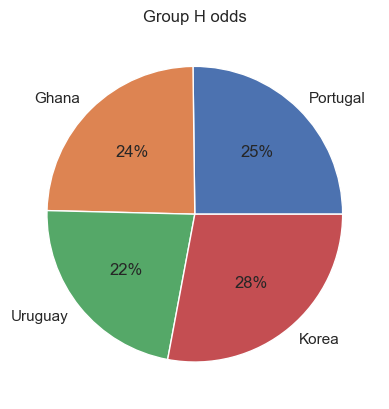

In [83]:
plt.title('Group H odds')
plt.pie(GroupH_ratio, labels=GroupH_labels, autopct='%1.f%%')
plt.show()

In [84]:
# df1의 나라들을 df4에 있는 팀인지 추려서 그 값을 합친 후 결과 산출
worldcup_teams = df1['Team']
df_teams_home = df4[df4['Home Team'].isin(worldcup_teams)]
df_teams_away = df4[df4['Away Team'].isin(worldcup_teams)]
df_teams = pd.concat((df_teams_home, df_teams_away))
df_teams.drop_duplicates()
df_teams.count()
df_teams.head(len(df_teams))

,ID,Tournament,Date,Home Team,Home Goals,Away Goals,Away Team,Winning Team,Losing Team,Win Conditions,Home Stadium,Goal Difference
1,2,Friendly,1873-03-08,England,4,2,Scotland,England,Scotland,No,True,2
3,4,Friendly,1875-03-06,England,2,2,Scotland,Draw,Draw,No,True,0
6,7,Friendly,1877-03-03,England,1,3,Scotland,Scotland,England,No,True,2
7,8,Friendly,1877-03-05,Wales,0,2,Scotland,Scotland,Wales,No,True,2
10,11,Friendly,1879-01-18,England,2,1,Wales,England,Wales,No,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...
17761,17762,Friendly,2022-09-27,South Korea,1,0,Cameroon,South Korea,Cameroon,No,True,1
17763,17764,Friendly,2022-09-27,Paraguay,0,0,Morocco,Draw,Draw,No,False,0
17765,17766,Friendly,2022-09-27,Saudi Arabia,0,0,United States,Draw,Draw,No,False,0
17766,17767,UEFA Nations League,2022-09-27,Portugal,0,1,Spain,Spain,Portugal,No,True,1


In [85]:
# 최초의 월드컵이 1930년이므로 이전 경기 제외
year = []
for row in df_teams['Date']:
    year.append(int(row[:4]))
df_teams['match_year'] = year
df_teams_1930 = df_teams[df_teams.match_year >= 1930]
df_teams_1930.head(len(df_teams_1930))

,ID,Tournament,Date,Home Team,Home Goals,Away Goals,Away Team,Winning Team,Losing Team,Win Conditions,Home Stadium,Goal Difference,match_year
857,858,Friendly,1930-01-01,Spain,1,0,Czechoslovakia,Spain,Czechoslovakia,No,True,1,1930
858,859,Friendly,1930-01-12,Portugal,1,0,Czechoslovakia,Portugal,Czechoslovakia,No,True,1,1930
861,862,Friendly,1930-02-23,Portugal,2,0,France,Portugal,France,No,True,2,1930
862,863,Friendly,1930-03-02,Germany,0,2,Italy,Italy,Germany,No,True,2,1930
863,864,Friendly,1930-03-23,France,3,3,Switzerland,Draw,Draw,No,True,0,1930
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17761,17762,Friendly,2022-09-27,South Korea,1,0,Cameroon,South Korea,Cameroon,No,True,1,2022
17763,17764,Friendly,2022-09-27,Paraguay,0,0,Morocco,Draw,Draw,No,False,0,2022
17765,17766,Friendly,2022-09-27,Saudi Arabia,0,0,United States,Draw,Draw,No,False,0,2022
17766,17767,UEFA Nations League,2022-09-27,Portugal,0,1,Spain,Spain,Portugal,No,True,1,2022


In [86]:
# train값과 test값을 산출하기 위해 필요없는 string형의 모든 열 제거
df_teams_1930 = df_teams.drop(['Tournament', 'Date', 'Home Goals', 'Away Goals', 'Losing Team', 'Win Conditions', 'Goal Difference', 'match_year'], axis=1)
df_teams_1930.head()

,ID,Home Team,Away Team,Winning Team,Home Stadium
1,2,England,Scotland,England,True
3,4,England,Scotland,Draw,True
6,7,England,Scotland,Scotland,True
7,8,Wales,Scotland,Scotland,True
10,11,England,Wales,England,True


In [87]:
# test, train값 산출을 위해 Winning Team 열을 새로운 조건에 맞게 변경
df_teams_1930 = df_teams_1930.reset_index(drop=True)
df_teams_1930.loc[df_teams_1930['Winning Team'] == df_teams_1930['Home Team'],'Winning Team']=2
df_teams_1930.loc[df_teams_1930['Winning Team'] == 'Draw', 'Winning Team']=1
df_teams_1930.loc[df_teams_1930['Winning Team'] == df_teams_1930['Away Team'], 'Winning Team']=0

df_teams_1930.head()

,ID,Home Team,Away Team,Winning Team,Home Stadium
0,2,England,Scotland,2,True
1,4,England,Scotland,1,True
2,7,England,Scotland,0,True
3,8,Wales,Scotland,0,True
4,11,England,Wales,2,True


In [88]:
final = pd.get_dummies(df_teams_1930, prefix=['Home Team', 'Away Team'], columns=['Home Team', 'Away Team'])

X = final.drop(['Winning Team'], axis=1)
y = final["Winning Team"]
y = y.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
final.head(len(final))

,ID,Winning Team,Home Stadium,Home Team_Afghanistan,Home Team_Albania,Home Team_Algeria,Home Team_Andalusia,Home Team_Andorra,Home Team_Angola,Home Team_Antigua and Barbuda,...,Away Team_Venezuela,Away Team_Vietnam,Away Team_Vietnam Republic,Away Team_Wales,Away Team_Western Australia,Away Team_Yemen,Away Team_Yemen DPR,Away Team_Yugoslavia,Away Team_Zambia,Away Team_Zimbabwe
0,2,2,True,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,1,True,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,True,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8,0,True,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,11,2,True,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21637,17762,2,True,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21638,17764,1,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21639,17766,1,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21640,17767,0,True,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
# test, train값 산출
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
score = logreg.score(X_train, y_train)
score2 = logreg.score(X_test, y_test)
print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.481
Test set accuracy:  0.479


In [90]:
df2.rename(columns={0:'ID'}, inplace= True)
df2.rename(columns={1:'Year'}, inplace=True)
df2.rename(columns={2:'Date'}, inplace=True)
df2.rename(columns={3:'Stage'}, inplace= True)
df2.rename(columns={4:'Home Team'}, inplace=True)
df2.rename(columns={5:'Away Team'}, inplace=True)
df2.rename(columns={6:'Host Team'}, inplace= True)
df2.drop(index=0, axis=0)
pred_set = []

df2.insert(1, 'First Position', df2['Home Team'].map(df1.set_index('Team')['FIFA Ranking']))
df2.insert(2, 'Second Position', df2['Away Team'].map(df1.set_index('Team')['FIFA Ranking']))

fixtures = df2.iloc[:48, :]
fixtures.head(len(fixtures))

,ID,First Position,Second Position,Year,Date,Stage,Home Team,Away Team,Host Team
0,1,50,44,2022,2022-11-20,Group stage,Qatar,Ecuador,True
1,2,18,8,2022,2022-11-21,Group stage,Senegal,Netherlands,False
2,3,5,20,2022,2022-11-21,Group stage,England,Iran,False
3,4,16,19,2022,2022-11-21,Group stage,United States,Wales,False
4,5,4,38,2022,2022-11-22,Group stage,France,Australia,False
5,6,10,30,2022,2022-11-22,Group stage,Denmark,Tunisia,False
6,7,13,26,2022,2022-11-22,Group stage,Mexico,Poland,False
7,8,3,51,2022,2022-11-22,Group stage,Argentina,Saudi Arabia,False
8,9,2,41,2022,2022-11-23,Group stage,Belgium,Canada,False
9,10,7,31,2022,2022-11-23,Group stage,Spain,Costa Rica,False


In [91]:
for index, row in df2.iterrows():
    if row['First Position'] < row['Second Position']:
        pred_set.append({'Home Team': row['Home Team'], 'Away Team': row['Away Team'], 'Winning Team': None})
    else:
        pred_set.append({'Home Team': row['Away Team'], 'Away Team': row['Home Team'], 'Winning Team': None})
        
pred_set = pd.DataFrame(pred_set)
backup_pred_set = pred_set

pred_set.head()

,Home Team,Away Team,Winning Team
0,Ecuador,Qatar,None
1,Senegal,Netherlands,None
2,Iran,England,None
3,United States,Wales,None
4,Australia,France,None


In [92]:
pred_set = pd.get_dummies(pred_set, prefix=['Home Team', 'Away Team'], columns=['Home Team', 'Away Team'])

missing_cols = set(final.columns) - set(pred_set.columns)
for c in missing_cols:
    pred_set[c] = 0
pred_set = pred_set[final.columns]
pred_set = pred_set.drop(['Winning Team'], axis=1)
pred_set.head(len(pred_set))

C:\Users\knh30\AppData\Local\Temp\ipykernel_34200\1259472959.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\knh30\AppData\Local\Temp\ipykernel_34200\1259472959.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\knh30\AppData\Local\Temp\ipykernel_34200\1259472959.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

,ID,Home Stadium,Home Team_Afghanistan,Home Team_Albania,Home Team_Algeria,Home Team_Andalusia,Home Team_Andorra,Home Team_Angola,Home Team_Antigua and Barbuda,Home Team_Argentina,...,Away Team_Venezuela,Away Team_Vietnam,Away Team_Vietnam Republic,Away Team_Wales,Away Team_Western Australia,Away Team_Yemen,Away Team_Yemen DPR,Away Team_Yugoslavia,Away Team_Zambia,Away Team_Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
predictions = logreg.predict(pred_set)
for i in range(fixtures.shape[0]):
    print(backup_pred_set.iloc[i, 1] + " and " + backup_pred_set.iloc[i, 0])
    if predictions[i] == 2:
        print("Winner: " + backup_pred_set.iloc[i, 1])
    elif predictions[i] == 1:
        print("Draw")
    elif predictions[i] == 0:
        print("Winner: " + backup_pred_set.iloc[i, 0])
    print('Probability of ' + backup_pred_set.iloc[i, 1] + ' winning: ', '%.3f'%(logreg.predict_proba(pred_set)[i][2]))
    print('Probability of Draw: ', '%.3f'%(logreg.predict_proba(pred_set)[i][1]))
    print('Probability of ' + backup_pred_set.iloc[i, 0] + ' winning: ', '%.3f'%(logreg.predict_proba(pred_set)[i][0]))
    print()

Qatar and Ecuador
Winner: Qatar
Probability of Qatar winning:  0.418
Probability of Draw:  0.276
Probability of Ecuador winning:  0.307

Netherlands and Senegal
Winner: Netherlands
Probability of Netherlands winning:  0.418
Probability of Draw:  0.275
Probability of Senegal winning:  0.307

England and Iran
Winner: England
Probability of England winning:  0.412
Probability of Draw:  0.274
Probability of Iran winning:  0.314

Wales and United States
Winner: Wales
Probability of Wales winning:  0.429
Probability of Draw:  0.270
Probability of United States winning:  0.301

France and Australia
Winner: France
Probability of France winning:  0.421
Probability of Draw:  0.272
Probability of Australia winning:  0.308

Tunisia and Denmark
Winner: Tunisia
Probability of Tunisia winning:  0.421
Probability of Draw:  0.276
Probability of Denmark winning:  0.303

Poland and Mexico
Winner: Poland
Probability of Poland winning:  0.426
Probability of Draw:  0.274
Probability of Mexico winning:  0.30

In [101]:
Round_of_16 = [('Netherlands', 'Iran'),
            ('Saudi Arabia', 'Australia'),
            ('Spain', 'Morocco'),
            ('Cameron', 'Ghana'),
            ('England', 'Qatar'),
            ('France', 'Argentina'),
            ('Canada', 'Costa Rica'),
            ('Portugal', 'Serbia')]

In [102]:
def clean_and_predict(matches, df1, final, logreg):

    # Initialization of auxiliary list for data cleaning
    positions = []

    # Loop to retrieve each team's position according to FIFA ranking
    for match in matches:
        positions.append(df1.loc[df1['Team'] == match[1],'FIFA Ranking'].iloc[0])
        positions.append(df1.loc[df1['Team'] == match[1],'FIFA Ranking'].iloc[0])
    
    # Creating the DataFrame for prediction
    pred_set = []

    # Initializing iterators for while loop
    i = 0
    j = 0

    # 'i' will be the iterator for the 'positions' list, and 'j' for the list of matches (list of tuples)
    while i < len(positions):
        dict1 = {}

        # If position of first team is better, he will be the 'home' team, and vice-versa
        if positions[i] < positions[i + 1]:
            dict1.update({'Home Team': matches[j][0], 'Away Team': matches[j][1]})
        else:
            dict1.update({'Home Team': matches[j][1], 'Away Team': matches[j][0]})

        # Append updated dictionary to the list, that will later be converted into a DataFrame
        pred_set.append(dict1)
        i += 2
        j += 1

    # Convert list into DataFrame
    pred_set = pd.DataFrame(pred_set)
    backup_pred_set = pred_set

    # Get dummy variables and drop winning_team column
    pred_set = pd.get_dummies(pred_set, prefix=['Home Team', 'Away Team'], columns=['Home Team', 'Away Team'])

    # Add missing columns compared to the model's training dataset
    missing_cols2 = set(final.columns) - set(pred_set.columns)
    for c in missing_cols2:
        pred_set[c] = 0
    pred_set = pred_set[final.columns]

    # Remove winning team column
    pred_set = pred_set.drop(['Winning Team'], axis=1)

    # Predict!
    predictions = logreg.predict(pred_set)
    for i in range(len(pred_set)):
        print(backup_pred_set.iloc[i, 1] + " and " + backup_pred_set.iloc[i, 0])
        if predictions[i] == 2:
            print("Winner: " + backup_pred_set.iloc[i, 1])
        elif predictions[i] == 1:
            print("Draw")
        elif predictions[i] == 0:
            print("Winner: " + backup_pred_set.iloc[i, 0])
        print('Probability of ' + backup_pred_set.iloc[i, 1] + ' winning: ' , '%.3f'%(logreg.predict_proba(pred_set)[i][2]))
        print('Probability of Draw: ', '%.3f'%(logreg.predict_proba(pred_set)[i][1])) 
        print('Probability of ' + backup_pred_set.iloc[i, 0] + ' winning: ', '%.3f'%(logreg.predict_proba(pred_set)[i][0]))
        print("")

clean_and_predict(Round_of_16, df1, final, logreg)

C:\Users\knh30\AppData\Local\Temp\ipykernel_34200\1356984590.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\knh30\AppData\Local\Temp\ipykernel_34200\1356984590.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\knh30\AppData\Local\Temp\ipykernel_34200\1356984590.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

Netherlands and Iran
Winner: Netherlands
Probability of Netherlands winning:  0.420
Probability of Draw:  0.273
Probability of Iran winning:  0.307

Saudi Arabia and Australia
Winner: Saudi Arabia
Probability of Saudi Arabia winning:  0.419
Probability of Draw:  0.274
Probability of Australia winning:  0.307

Spain and Morocco
Winner: Spain
Probability of Spain winning:  0.416
Probability of Draw:  0.277
Probability of Morocco winning:  0.307

Cameron and Ghana
Winner: Cameron
Probability of Cameron winning:  0.422
Probability of Draw:  0.276
Probability of Ghana winning:  0.301

England and Qatar
Winner: England
Probability of England winning:  0.405
Probability of Draw:  0.276
Probability of Qatar winning:  0.319

France and Argentina
Winner: France
Probability of France winning:  0.435
Probability of Draw:  0.269
Probability of Argentina winning:  0.296

Canada and Costa Rica
Winner: Canada
Probability of Canada winning:  0.423
Probability of Draw:  0.275
Probability of Costa Rica w

In [104]:
Quarter_Finals = [('Netherlands', 'Saudi Arabia'),
                  ('Spain', 'Cameroon'),
                  ('England', 'France'),
                  ('Canada', 'Portugal')]

clean_and_predict(Quarter_Finals, df1, final, logreg)

C:\Users\knh30\AppData\Local\Temp\ipykernel_34200\1356984590.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\knh30\AppData\Local\Temp\ipykernel_34200\1356984590.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\knh30\AppData\Local\Temp\ipykernel_34200\1356984590.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

Netherlands and Saudi Arabia
Winner: Netherlands
Probability of Netherlands winning:  0.418
Probability of Draw:  0.273
Probability of Saudi Arabia winning:  0.308

Spain and Cameroon
Winner: Spain
Probability of Spain winning:  0.413
Probability of Draw:  0.278
Probability of Cameroon winning:  0.308

England and France
Winner: England
Probability of England winning:  0.416
Probability of Draw:  0.271
Probability of France winning:  0.313

Canada and Portugal
Winner: Canada
Probability of Canada winning:  0.425
Probability of Draw:  0.275
Probability of Portugal winning:  0.300



C:\Users\knh30\AppData\Local\Temp\ipykernel_34200\1356984590.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\knh30\AppData\Local\Temp\ipykernel_34200\1356984590.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\knh30\AppData\Local\Temp\ipykernel_34200\1356984590.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

In [106]:
Semi_Finals = [('Netherlands', 'Spain'),
                  ('England', 'Canada')]
clean_and_predict(Semi_Finals, df1, final, logreg)

C:\Users\knh30\AppData\Local\Temp\ipykernel_34200\1356984590.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\knh30\AppData\Local\Temp\ipykernel_34200\1356984590.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\knh30\AppData\Local\Temp\ipykernel_34200\1356984590.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

Netherlands and Spain
Winner: Netherlands
Probability of Netherlands winning:  0.427
Probability of Draw:  0.270
Probability of Spain winning:  0.303

England and Canada
Winner: England
Probability of England winning:  0.407
Probability of Draw:  0.274
Probability of Canada winning:  0.318



C:\Users\knh30\AppData\Local\Temp\ipykernel_34200\1356984590.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\knh30\AppData\Local\Temp\ipykernel_34200\1356984590.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\knh30\AppData\Local\Temp\ipykernel_34200\1356984590.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

In [107]:
Finals = [('Netherlands', 'England')]
clean_and_predict(Finals, df1, final, logreg)

C:\Users\knh30\AppData\Local\Temp\ipykernel_34200\1356984590.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\knh30\AppData\Local\Temp\ipykernel_34200\1356984590.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\knh30\AppData\Local\Temp\ipykernel_34200\1356984590.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

Netherlands and England
Winner: Netherlands
Probability of Netherlands winning:  0.428
Probability of Draw:  0.271
Probability of England winning:  0.301



C:\Users\knh30\AppData\Local\Temp\ipykernel_34200\1356984590.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\knh30\AppData\Local\Temp\ipykernel_34200\1356984590.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\knh30\AppData\Local\Temp\ipykernel_34200\1356984590.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1